In [1]:
# Importing all the necessary packages 
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly.express as px

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [2]:
# Loading the dataset 
#data=pd.read_csv('weatherAUS.csv')
data=pd.read_csv('weatherAUS.csv',
                 parse_dates=['Date'],
                 infer_datetime_format=True,
                 index_col='Date',
                 thousands=',',
                 decimal='.')

In [3]:
data.head()

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
Date                                                                     
2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

           WindGustDir  WindGustSpeed WindDir9am WindDir3pm  ...  Humidity9am  \
Date                                                         ...                
2008-12-01           W           44.0          W        WNW  ...         71.0   
2008-12-02         WNW           44.0        NNW        WSW  ...         44.0   
2008-12-03         WSW           46.0          W        WSW  ...         38.0   
2008-12-04          NE           24.0         SE          E  ...         45.0   
2008-12-05           W           41.0        ENE         NW  ...         82.0   

            Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
Date                                                                    
2008-12-01         22.0       1007.7       1007.1       8.0       NaN   
2008-12-02         25.0       1010.6       1007.8       NaN       NaN   
2008-12-03         30.0       1007.6       1008.7       NaN       2.0   
2008-12-04         16.0       1017.6       1012.8       NaN       NaN   
2008-12-05         33.0       1010.8       1006.0       7.0       8.0   

            Temp9am  Temp3pm  RainToday  RainTomorrow  
Date                                                   
2008-12-01     16.9     21.8         No            No  
2008-12-02     17.2     24.3         No            No  
2008-12-03     21.0     23.2         No            No  
2008-12-04     18.1     26.5         No            No  
2008-12-05     17.8     29.7         No            No  

[5 rows x 22 columns]

In [4]:
data.columns


Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [5]:
# Lets check the dimension of the data set 
data.shape


(145460, 22)

In [6]:
data.isnull().any()

Location         False
MinTemp           True
MaxTemp           True
Rainfall          True
Evaporation       True
Sunshine          True
WindGustDir       True
WindGustSpeed     True
WindDir9am        True
WindDir3pm        True
WindSpeed9am      True
WindSpeed3pm      True
Humidity9am       True
Humidity3pm       True
Pressure9am       True
Pressure3pm       True
Cloud9am          True
Cloud3pm          True
Temp9am           True
Temp3pm           True
RainToday         True
RainTomorrow      True
dtype: bool

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 145460 entries, 2008-12-01 to 2017-06-25
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       145460 non-null  object 
 1   MinTemp        143975 non-null  float64
 2   MaxTemp        144199 non-null  float64
 3   Rainfall       142199 non-null  float64
 4   Evaporation    82670 non-null   float64
 5   Sunshine       75625 non-null   float64
 6   WindGustDir    135134 non-null  object 
 7   WindGustSpeed  135197 non-null  float64
 8   WindDir9am     134894 non-null  object 
 9   WindDir3pm     141232 non-null  object 
 10  WindSpeed9am   143693 non-null  float64
 11  WindSpeed3pm   142398 non-null  float64
 12  Humidity9am    142806 non-null  float64
 13  Humidity3pm    140953 non-null  float64
 14  Pressure9am    130395 non-null  float64
 15  Pressure3pm    130432 non-null  float64
 16  Cloud9am       89572 non-null   float64
 17  Cloud3pm     

In [8]:

# Imputing missing values of numeric columns with their respective columns mean value
data.fillna(data.mean(), inplace=True)

/var/folders/b8/bmq4rlpn1d32yd4c88zdz0600000gp/T/ipykernel_2669/904043690.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.fillna(data.mean(), inplace=True)


In [9]:
#Added most frequent value in place of nan for non-numerical columns
data['RainToday']=data['RainToday'].replace(np.nan, data['RainToday'].value_counts().idxmax())
data['WindDir3pm']=data['WindDir3pm'].replace(np.nan, data['WindDir3pm'].value_counts().idxmax())
data['WindDir9am']=data['WindDir9am'].replace(np.nan, data['WindDir9am'].value_counts().idxmax())
data['WindGustDir']=data['WindGustDir'].replace(np.nan, data['WindGustDir'].value_counts().idxmax())
data['RainTomorrow']=data['RainTomorrow'].replace(np.nan, data['RainTomorrow'].value_counts().idxmax())

In [10]:
data.isna().any()


Location         False
MinTemp          False
MaxTemp          False
Rainfall         False
Evaporation      False
Sunshine         False
WindGustDir      False
WindGustSpeed    False
WindDir9am       False
WindDir3pm       False
WindSpeed9am     False
WindSpeed3pm     False
Humidity9am      False
Humidity3pm      False
Pressure9am      False
Pressure3pm      False
Cloud9am         False
Cloud3pm         False
Temp9am          False
Temp3pm          False
RainToday        False
RainTomorrow     False
dtype: bool

In [11]:
#Cleanes Data
data.head()

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
Date                                                                     
2008-12-01   Albury     13.4     22.9       0.6     5.468232  7.611178   
2008-12-02   Albury      7.4     25.1       0.0     5.468232  7.611178   
2008-12-03   Albury     12.9     25.7       0.0     5.468232  7.611178   
2008-12-04   Albury      9.2     28.0       0.0     5.468232  7.611178   
2008-12-05   Albury     17.5     32.3       1.0     5.468232  7.611178   

           WindGustDir  WindGustSpeed WindDir9am WindDir3pm  ...  Humidity9am  \
Date                                                         ...                
2008-12-01           W           44.0          W        WNW  ...         71.0   
2008-12-02         WNW           44.0        NNW        WSW  ...         44.0   
2008-12-03         WSW           46.0          W        WSW  ...         38.0   
2008-12-04          NE           24.0         SE          E  ...         45.0   
2008-12-05           W           41.0        ENE         NW  ...         82.0   

            Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
Date                                                                    
2008-12-01         22.0       1007.7       1007.1  8.000000   4.50993   
2008-12-02         25.0       1010.6       1007.8  4.447461   4.50993   
2008-12-03         30.0       1007.6       1008.7  4.447461   2.00000   
2008-12-04         16.0       1017.6       1012.8  4.447461   4.50993   
2008-12-05         33.0       1010.8       1006.0  7.000000   8.00000   

            Temp9am  Temp3pm  RainToday  RainTomorrow  
Date                                                   
2008-12-01     16.9     21.8         No            No  
2008-12-02     17.2     24.3         No            No  
2008-12-03     21.0     23.2         No            No  
2008-12-04     18.1     26.5         No            No  
2008-12-05     17.8     29.7         No            No  

[5 rows x 22 columns]

In [12]:
data.isnull().sum()


Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [13]:
# Basic statistics of the data:
data.describe().T


count         mean        std    min          25%  \
MinTemp        145460.0    12.194034   6.365750   -8.5     7.700000   
MaxTemp        145460.0    23.221348   7.088124   -4.8    18.000000   
Rainfall       145460.0     2.360918   8.382488    0.0     0.000000   
Evaporation    145460.0     5.468232   3.161541    0.0     4.000000   
Sunshine       145460.0     7.611178   2.729486    0.0     7.611178   
WindGustSpeed  145460.0    40.035230  13.118253    6.0    31.000000   
WindSpeed9am   145460.0    14.043426   8.861059    0.0     7.000000   
WindSpeed3pm   145460.0    18.662657   8.716581    0.0    13.000000   
Humidity9am    145460.0    68.880831  18.854765    0.0    57.000000   
Humidity3pm    145460.0    51.539116  20.471189    0.0    37.000000   
Pressure9am    145460.0  1017.649940   6.728467  980.5  1013.500000   
Pressure3pm    145460.0  1015.255889   6.663973  977.1  1011.100000   
Cloud9am       145460.0     4.447461   2.265604    0.0     3.000000   
Cloud3pm       145460.0     4.509930   2.092954    0.0     4.000000   
Temp9am        145460.0    16.990631   6.449221   -7.2    12.300000   
Temp3pm        145460.0    21.683390   6.850057   -5.4    16.700000   

                       50%          75%     max  
MinTemp          12.100000    16.800000    33.9  
MaxTemp          22.700000    28.200000    48.1  
Rainfall          0.000000     1.000000   371.0  
Evaporation       5.468232     5.468232   145.0  
Sunshine          7.611178     8.700000    14.5  
WindGustSpeed    39.000000    46.000000   135.0  
WindSpeed9am     13.000000    19.000000   130.0  
WindSpeed3pm     18.662657    24.000000    87.0  
Humidity9am      69.000000    83.000000   100.0  
Humidity3pm      51.539116    65.000000   100.0  
Pressure9am    1017.649940  1021.800000  1041.0  
Pressure3pm    1015.255889  1019.400000  1039.6  
Cloud9am          4.447461     6.000000     9.0  
Cloud3pm          4.509930     6.000000     9.0  
Temp9am          16.800000    21.500000    40.2  
Temp3pm          21.400000    26.200000    46.7

/var/folders/b8/bmq4rlpn1d32yd4c88zdz0600000gp/T/ipykernel_2669/2360802123.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask=np.zeros_like(corrMatrix, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),


<AxesSubplot:>

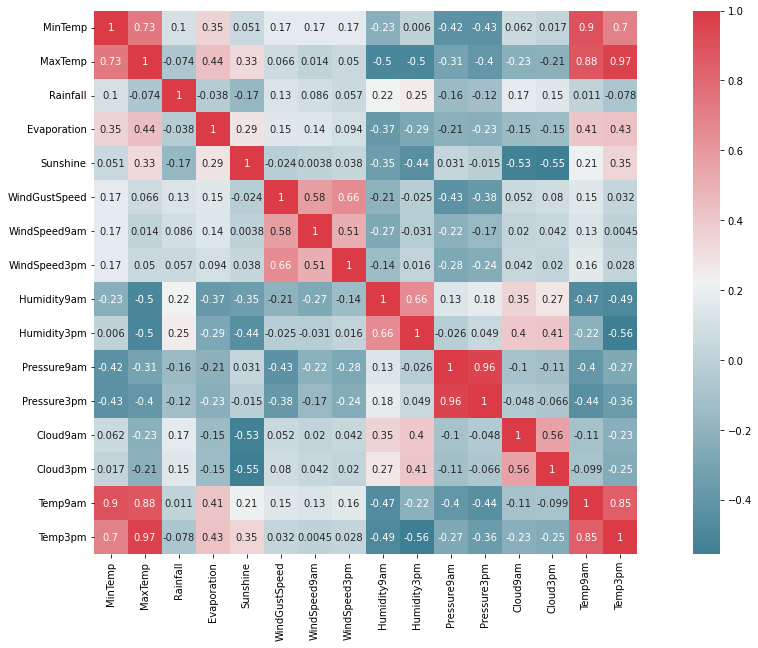

In [14]:
corrMatrix = data.corr()
f, ax = plt.subplots(figsize=(20, 10))
corr = data.corr("pearson")
sns.heatmap(corr, mask=np.zeros_like(corrMatrix, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax,annot=True)

In [15]:
for col in ["Rainfall","Evaporation","WindSpeed9am","WindSpeed3pm"]:
    q1=np.quantile(data[col],0.25)
    q3=np.quantile(data[col],0.75)
    iqr=q3-q1
    
    lower=round(q1-1.5*iqr,2)
    upper=round(q3+1.5*iqr,2)
    
    print(f"{col}: |upper: {upper} |lower: {lower}")

Rainfall: |upper: 2.5 |lower: -1.5
Evaporation: |upper: 7.67 |lower: 1.8
WindSpeed9am: |upper: 37.0 |lower: -11.0
WindSpeed3pm: |upper: 40.5 |lower: -3.5


In [16]:
fig = px.bar(data[["Location","Rainfall"]].groupby("Location").mean().sort_values(by="Rainfall").iloc[:15],x = "Rainfall",)
fig.update_layout(
title={
    "x":0.9,
    "y":0.95,
    "xanchor":"center",
    "yanchor":"top",
    "text": "Top 15 Location Rainfall"
})
fig.show()

In [17]:
data['RainTomorrow'].value_counts()


No     113583
Yes     31877
Name: RainTomorrow, dtype: int64

In [18]:
data["RainTomorrow"] = data["RainTomorrow"].map({"Yes":1,"No":0})
data["RainToday"] = data["RainToday"].map({"Yes":1,"No":0})

data["RainTomorrow"].unique()

array([0, 1])

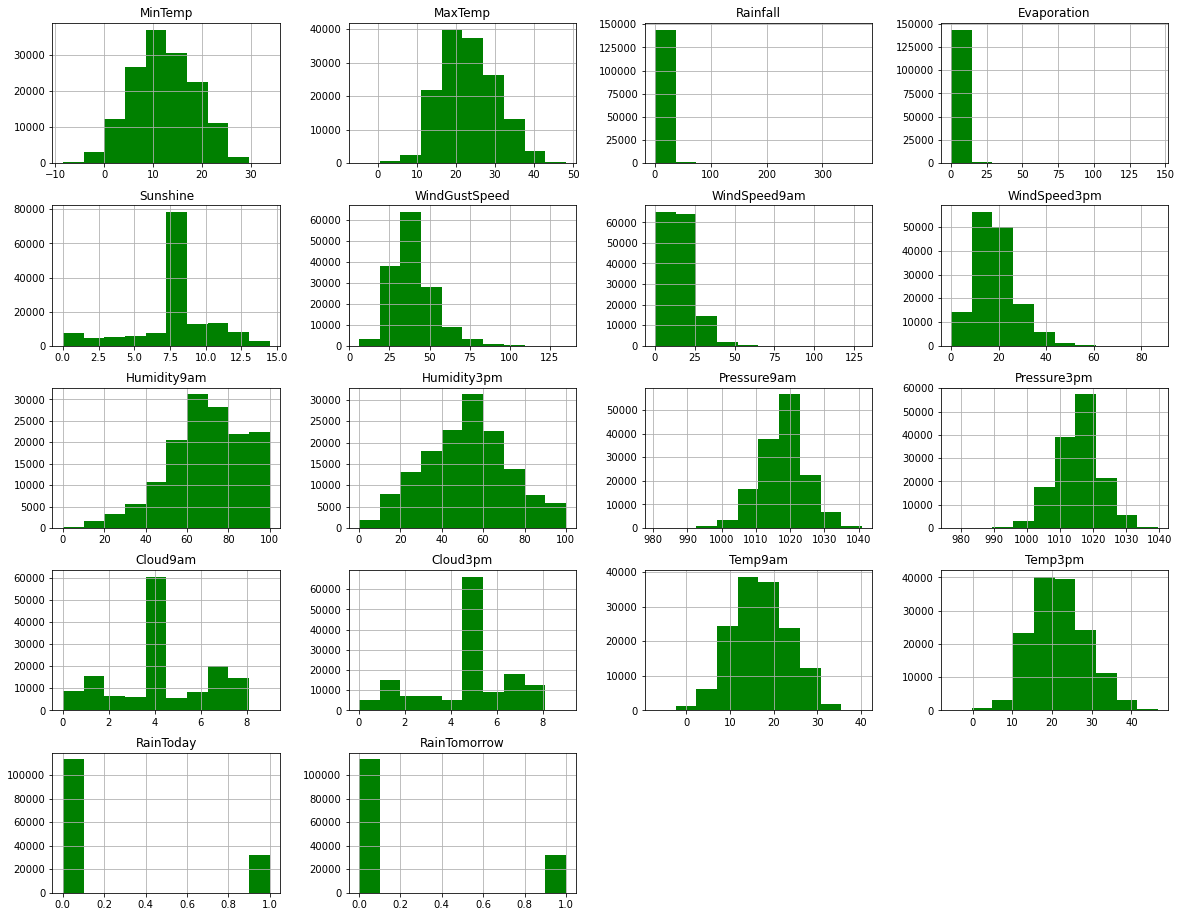

In [19]:
data.hist(figsize=(20,16), color = 'g');
plt.show();

In [20]:
cat_col=data.select_dtypes(include="object").columns
cat_col

Index(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'], dtype='object')

In [21]:
for col in cat_col:
    print(f"{col}: {data[col].nunique()}")

Location: 49
WindGustDir: 16
WindDir9am: 16
WindDir3pm: 16


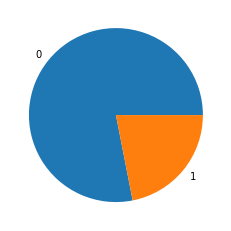

In [22]:
RainTom = data["RainTomorrow"].value_counts()
plt.pie(RainTom,labels=RainTom.index);


Drop row for which target label is not provided



In [23]:
data=data[(data["RainTomorrow"]==1)|(data["RainTomorrow"]==0)]


In [24]:
data['RainTomorrow'].value_counts()


0    113583
1     31877
Name: RainTomorrow, dtype: int64

In [25]:
X=data.drop("RainTomorrow",axis=1)
y=data["RainTomorrow"]

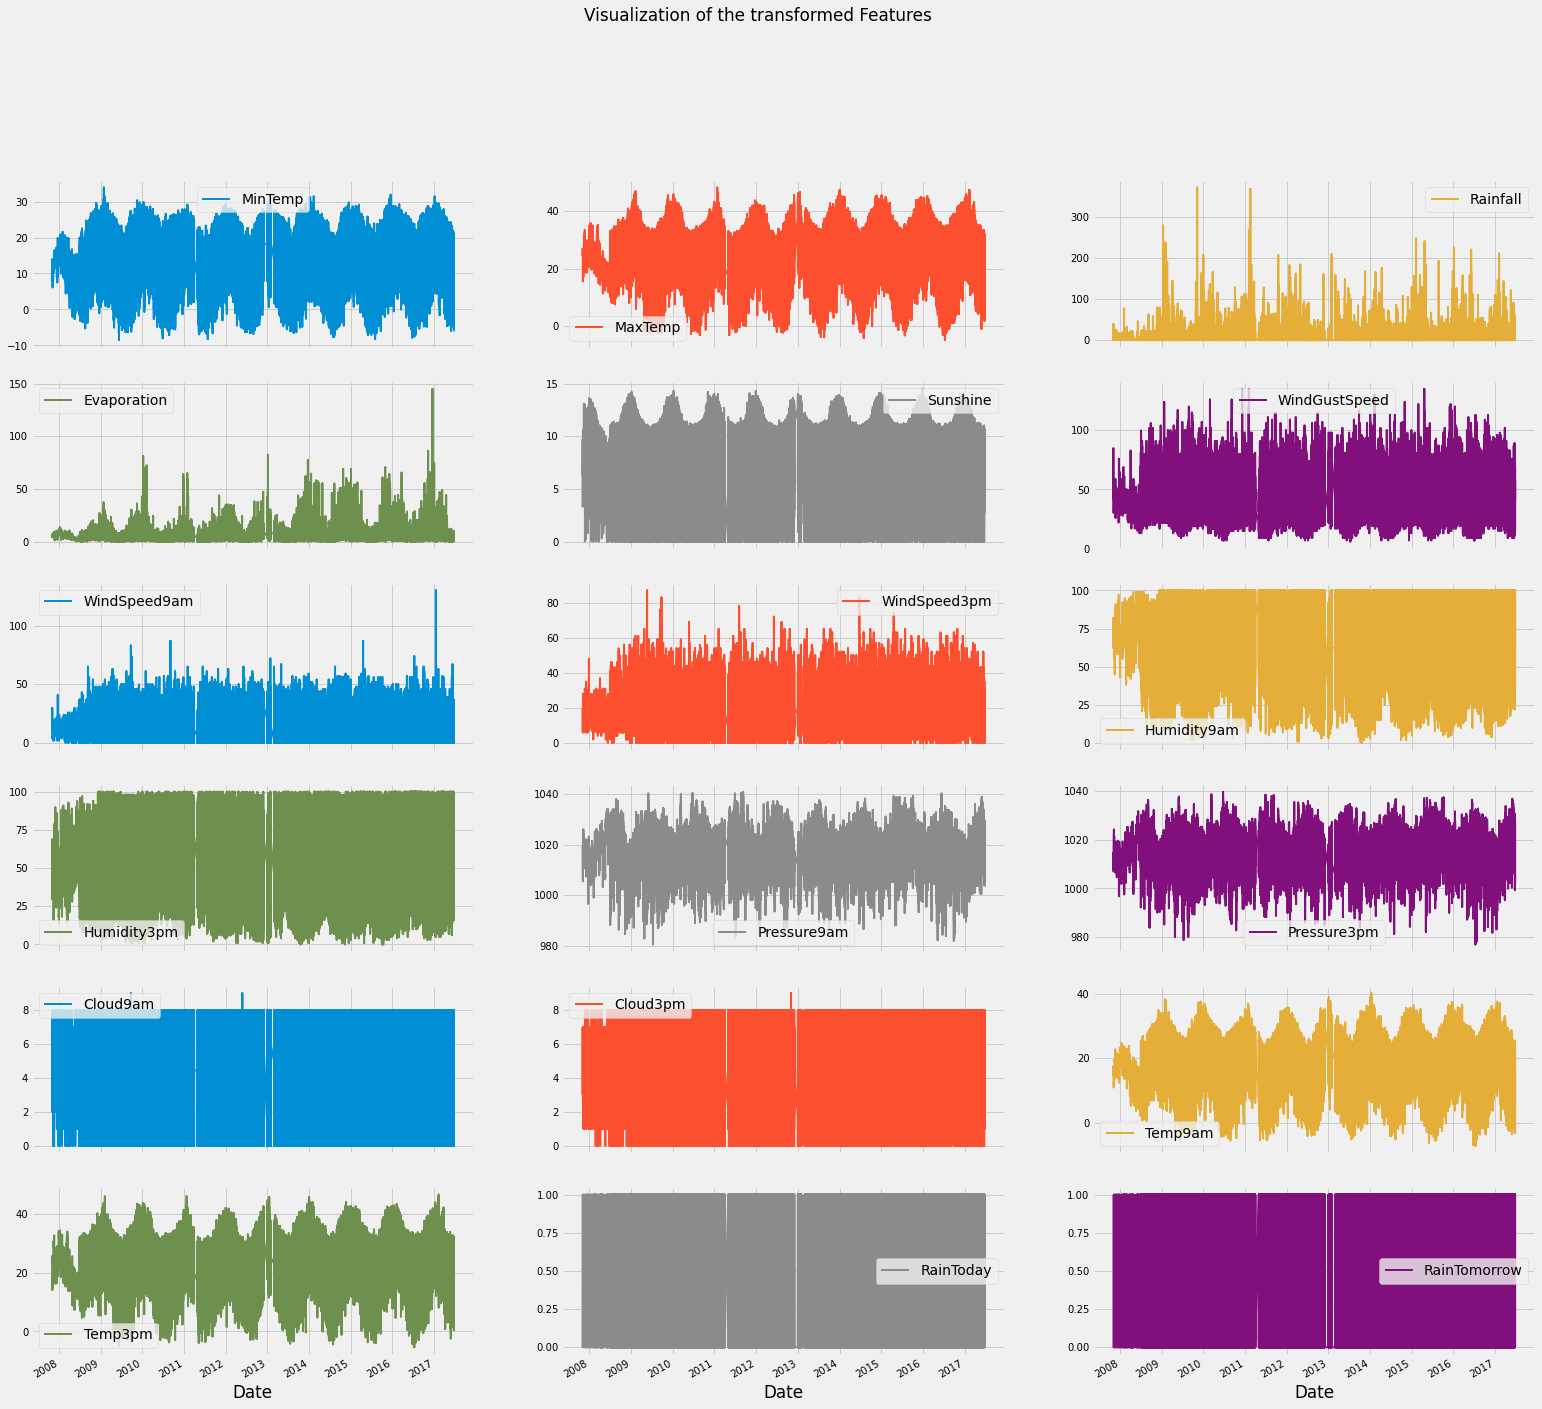

In [26]:
plt.style.use('fivethirtyeight')
data.plot(subplots=True,
                  layout=(6, 3),
                  figsize=(24,24),
                  fontsize=10, 
                  linewidth=2, 
                  title='Visualization of the transformed Features')
plt.show()

In [27]:
del data['Location']

In [28]:
cat_col=data.select_dtypes(include="object").columns
cat_col

Index(['WindGustDir', 'WindDir9am', 'WindDir3pm'], dtype='object')

In [29]:
#Encoding Categorical variables

def preprocessing(column):
    lbl = LabelEncoder()
    for col in column:
        lbl.fit(data[col])
        data[col] = lbl.transform(data[col].values.reshape(-1,))
columns_process = ['WindGustDir', 'WindDir9am', 'WindDir3pm']
preprocessing(columns_process)

In [30]:
data.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 145460 entries, 2008-12-01 to 2017-06-25
Data columns (total 21 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   MinTemp        145460 non-null  float64
 1   MaxTemp        145460 non-null  float64
 2   Rainfall       145460 non-null  float64
 3   Evaporation    145460 non-null  float64
 4   Sunshine       145460 non-null  float64
 5   WindGustDir    145460 non-null  int64  
 6   WindGustSpeed  145460 non-null  float64
 7   WindDir9am     145460 non-null  int64  
 8   WindDir3pm     145460 non-null  int64  
 9   WindSpeed9am   145460 non-null  float64
 10  WindSpeed3pm   145460 non-null  float64
 11  Humidity9am    145460 non-null  float64
 12  Humidity3pm    145460 non-null  float64
 13  Pressure9am    145460 non-null  float64
 14  Pressure3pm    145460 non-null  float64
 15  Cloud9am       145460 non-null  float64
 16  Cloud3pm       145460 non-null  float64
 17  Temp9am      

In [31]:
X=data.drop("RainTomorrow",axis=1)
y=data["RainTomorrow"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [32]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LSTM, SimpleRNN, Bidirectional, Activation
from keras.utils import to_categorical
from matplotlib import pyplot

In [34]:
X_train.shape

(123641, 20)

In [35]:
def model_one(n_features):
    model = Sequential()
    model.add(SimpleRNN(100, input_shape=(1,n_features), activation='relu')) #Simple RNN 
    model.add(Dropout(0.5))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [36]:
def model_two(n_features):
    model = Sequential()
    model.add(LSTM(100, input_shape=(1,n_features), activation='relu'))#LSTM layer
    model.add(Dropout(0.5))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
 

In [37]:
def model_three(n_features):
    model = Sequential()
    model.add(Bidirectional(LSTM(100, input_shape=(1,n_features), activation='relu')))
    model.add(Dropout(0.5))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [38]:
def model_four(n_features):
    model = Sequential()
    model.add(Bidirectional(LSTM(100, input_shape=(1,n_features), activation='relu')))
    model.add(Dropout(0.5))
    model.add(Dense(100, activation='relu'))
    model.add(Activation('sigmoid'))# Experiment by adding additional Activation Layer
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [39]:
def model_five(n_features):
    model = Sequential()
    model.add(Bidirectional(LSTM(300, return_sequences=True, input_shape=(1,n_features), activation='relu')))
    model.add(Dropout(0.5))
    model.add(LSTM(300, activation='relu'))#More Deeper Network
    model.add(Dense(100, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Activation('sigmoid'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [40]:
models = list()
models.append(model_one(X_train.shape[1]))
models.append(model_two(X_train.shape[1]))
models.append(model_three(X_train.shape[1]))
models.append(model_four(X_train.shape[1]))
models.append(model_five(X_train.shape[1]))



2022-09-07 14:53:31.193840: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [41]:
trainX = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
testX = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [42]:
# summarize scores
def summarize_results(scores):
    print(scores)
    s = mean([item[1] for item in scores])
    print('Mean Accuracy: %.2f%% ' % (s))

In [43]:
def fit_and_evalute(model):
    batch_size = 256
    num_epoch = 10
    #model training
    model_log = model.fit(trainX, y_train, epochs=num_epoch, batch_size=batch_size, validation_data=(testX, y_test))
    score = model.evaluate(testX, y_test, batch_size=batch_size)
    print('Test loss of Model# {} : ' , score[0]) 
    print('Test accuracy of Model# {} :', score[1]) 
    return model_log, score

Model # 1
Epoch 1/10
483/483 [==============================] - 2s 2ms/step - loss: 0.3825 - accuracy: 0.8341 - val_loss: 0.3587 - val_accuracy: 0.8427
Epoch 2/10
483/483 [==============================] - 1s 2ms/step - loss: 0.3640 - accuracy: 0.8428 - val_loss: 0.3553 - val_accuracy: 0.8451
Epoch 3/10
483/483 [==============================] - 1s 2ms/step - loss: 0.3590 - accuracy: 0.8454 - val_loss: 0.3568 - val_accuracy: 0.8456
Epoch 4/10
483/483 [==============================] - 1s 2ms/step - loss: 0.3566 - accuracy: 0.8457 - val_loss: 0.3553 - val_accuracy: 0.8445
Epoch 5/10
483/483 [==============================] - 1s 2ms/step - loss: 0.3536 - accuracy: 0.8476 - val_loss: 0.3519 - val_accuracy: 0.8451
Epoch 6/10
483/483 [==============================] - 1s 2ms/step - loss: 0.3528 - accuracy: 0.8483 - val_loss: 0.3545 - val_accuracy: 0.8437
Epoch 7/10
483/483 [==============================] - 1s 2ms/step - loss: 0.3516 - accuracy: 0.8485 - val_loss: 0.3584 - val_accuracy: 0.8

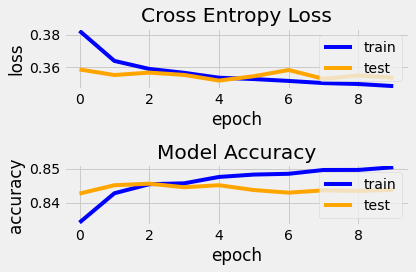

Epoch 1/10
483/483 [==============================] - 1s 2ms/step - loss: 0.3477 - accuracy: 0.8502 - val_loss: 0.3529 - val_accuracy: 0.8437
Epoch 2/10
483/483 [==============================] - 1s 2ms/step - loss: 0.3469 - accuracy: 0.8504 - val_loss: 0.3553 - val_accuracy: 0.8433
Epoch 3/10
483/483 [==============================] - 1s 2ms/step - loss: 0.3470 - accuracy: 0.8510 - val_loss: 0.3532 - val_accuracy: 0.8440
Epoch 4/10
483/483 [==============================] - 1s 2ms/step - loss: 0.3465 - accuracy: 0.8508 - val_loss: 0.3537 - val_accuracy: 0.8445
Epoch 5/10
483/483 [==============================] - 1s 2ms/step - loss: 0.3458 - accuracy: 0.8508 - val_loss: 0.3524 - val_accuracy: 0.8473
Epoch 6/10
483/483 [==============================] - 1s 2ms/step - loss: 0.3457 - accuracy: 0.8511 - val_loss: 0.3527 - val_accuracy: 0.8450
Epoch 7/10
483/483 [==============================] - 1s 2ms/step - loss: 0.3456 - accuracy: 0.8513 - val_loss: 0.3537 - val_accuracy: 0.8452
Epoch 

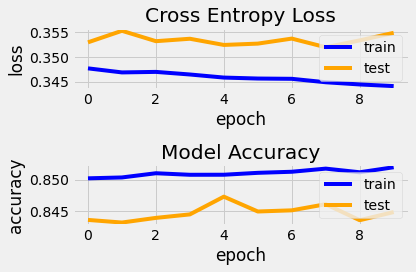

Epoch 1/10
483/483 [==============================] - 1s 2ms/step - loss: 0.3439 - accuracy: 0.8512 - val_loss: 0.3552 - val_accuracy: 0.8424
Epoch 2/10
483/483 [==============================] - 1s 2ms/step - loss: 0.3436 - accuracy: 0.8519 - val_loss: 0.3581 - val_accuracy: 0.8415
Epoch 3/10
483/483 [==============================] - 1s 2ms/step - loss: 0.3432 - accuracy: 0.8517 - val_loss: 0.3536 - val_accuracy: 0.8449
Epoch 4/10
483/483 [==============================] - 1s 2ms/step - loss: 0.3426 - accuracy: 0.8529 - val_loss: 0.3513 - val_accuracy: 0.8464
Epoch 5/10
483/483 [==============================] - 1s 2ms/step - loss: 0.3430 - accuracy: 0.8525 - val_loss: 0.3538 - val_accuracy: 0.8458
Epoch 6/10
483/483 [==============================] - 1s 2ms/step - loss: 0.3422 - accuracy: 0.8533 - val_loss: 0.3547 - val_accuracy: 0.8459
Epoch 7/10
483/483 [==============================] - 1s 2ms/step - loss: 0.3426 - accuracy: 0.8524 - val_loss: 0.3604 - val_accuracy: 0.8436
Epoch 

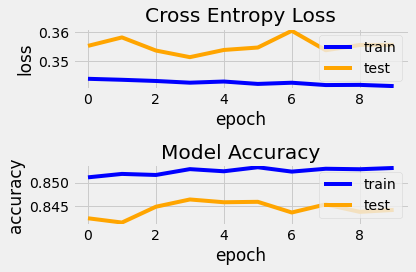

Epoch 1/10
483/483 [==============================] - 1s 2ms/step - loss: 0.3418 - accuracy: 0.8536 - val_loss: 0.3575 - val_accuracy: 0.8427
Epoch 2/10
483/483 [==============================] - 1s 2ms/step - loss: 0.3412 - accuracy: 0.8531 - val_loss: 0.3520 - val_accuracy: 0.8450
Epoch 3/10
483/483 [==============================] - 1s 2ms/step - loss: 0.3418 - accuracy: 0.8538 - val_loss: 0.3562 - val_accuracy: 0.8443
Epoch 4/10
483/483 [==============================] - 1s 2ms/step - loss: 0.3409 - accuracy: 0.8531 - val_loss: 0.3590 - val_accuracy: 0.8401
Epoch 5/10
483/483 [==============================] - 1s 2ms/step - loss: 0.3405 - accuracy: 0.8530 - val_loss: 0.3594 - val_accuracy: 0.8401
Epoch 6/10
483/483 [==============================] - 1s 2ms/step - loss: 0.3411 - accuracy: 0.8526 - val_loss: 0.3576 - val_accuracy: 0.8409
Epoch 7/10
483/483 [==============================] - 1s 2ms/step - loss: 0.3405 - accuracy: 0.8534 - val_loss: 0.3554 - val_accuracy: 0.8446
Epoch 

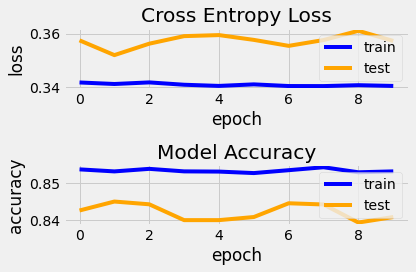

Epoch 1/10
483/483 [==============================] - 1s 2ms/step - loss: 0.3394 - accuracy: 0.8532 - val_loss: 0.3559 - val_accuracy: 0.8415
Epoch 2/10
483/483 [==============================] - 1s 2ms/step - loss: 0.3396 - accuracy: 0.8537 - val_loss: 0.3589 - val_accuracy: 0.8411
Epoch 3/10
483/483 [==============================] - 1s 2ms/step - loss: 0.3397 - accuracy: 0.8529 - val_loss: 0.3563 - val_accuracy: 0.8436
Epoch 4/10
483/483 [==============================] - 1s 2ms/step - loss: 0.3392 - accuracy: 0.8539 - val_loss: 0.3597 - val_accuracy: 0.8419
Epoch 5/10
483/483 [==============================] - 1s 2ms/step - loss: 0.3396 - accuracy: 0.8539 - val_loss: 0.3606 - val_accuracy: 0.8397
Epoch 6/10
483/483 [==============================] - 1s 2ms/step - loss: 0.3388 - accuracy: 0.8537 - val_loss: 0.3608 - val_accuracy: 0.8380
Epoch 7/10
483/483 [==============================] - 1s 2ms/step - loss: 0.3392 - accuracy: 0.8539 - val_loss: 0.3577 - val_accuracy: 0.8407
Epoch 

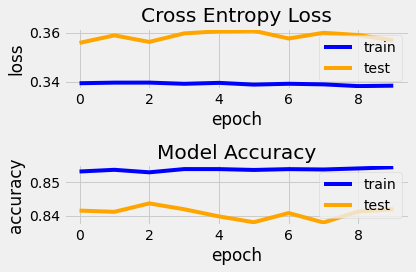

Epoch 1/10
483/483 [==============================] - 1s 2ms/step - loss: 0.3384 - accuracy: 0.8539 - val_loss: 0.3572 - val_accuracy: 0.8416
Epoch 2/10
483/483 [==============================] - 1s 2ms/step - loss: 0.3388 - accuracy: 0.8543 - val_loss: 0.3575 - val_accuracy: 0.8402
Epoch 3/10
483/483 [==============================] - 1s 2ms/step - loss: 0.3383 - accuracy: 0.8544 - val_loss: 0.3577 - val_accuracy: 0.8402
Epoch 4/10
483/483 [==============================] - 1s 2ms/step - loss: 0.3387 - accuracy: 0.8542 - val_loss: 0.3541 - val_accuracy: 0.8452
Epoch 5/10
483/483 [==============================] - 1s 2ms/step - loss: 0.3382 - accuracy: 0.8542 - val_loss: 0.3554 - val_accuracy: 0.8411
Epoch 6/10
483/483 [==============================] - 1s 2ms/step - loss: 0.3381 - accuracy: 0.8547 - val_loss: 0.3551 - val_accuracy: 0.8421
Epoch 7/10
483/483 [==============================] - 1s 2ms/step - loss: 0.3379 - accuracy: 0.8551 - val_loss: 0.3596 - val_accuracy: 0.8392
Epoch 

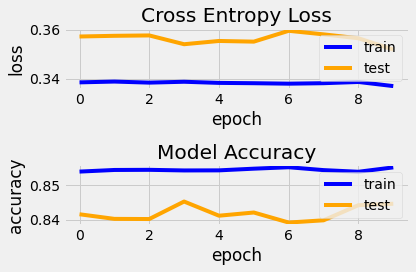

Epoch 1/10
483/483 [==============================] - 1s 2ms/step - loss: 0.3376 - accuracy: 0.8545 - val_loss: 0.3564 - val_accuracy: 0.8416
Epoch 2/10
483/483 [==============================] - 1s 2ms/step - loss: 0.3377 - accuracy: 0.8552 - val_loss: 0.3581 - val_accuracy: 0.8397
Epoch 3/10
483/483 [==============================] - 1s 2ms/step - loss: 0.3375 - accuracy: 0.8549 - val_loss: 0.3579 - val_accuracy: 0.8421
Epoch 4/10
483/483 [==============================] - 1s 2ms/step - loss: 0.3380 - accuracy: 0.8547 - val_loss: 0.3605 - val_accuracy: 0.8380
Epoch 5/10
483/483 [==============================] - 1s 2ms/step - loss: 0.3375 - accuracy: 0.8545 - val_loss: 0.3588 - val_accuracy: 0.8411
Epoch 6/10
483/483 [==============================] - 1s 2ms/step - loss: 0.3375 - accuracy: 0.8542 - val_loss: 0.3616 - val_accuracy: 0.8388
Epoch 7/10
483/483 [==============================] - 1s 2ms/step - loss: 0.3378 - accuracy: 0.8549 - val_loss: 0.3587 - val_accuracy: 0.8443
Epoch 

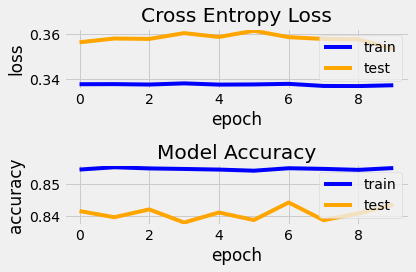

Epoch 1/10
483/483 [==============================] - 1s 2ms/step - loss: 0.3366 - accuracy: 0.8547 - val_loss: 0.3551 - val_accuracy: 0.8424
Epoch 2/10
483/483 [==============================] - 1s 2ms/step - loss: 0.3370 - accuracy: 0.8551 - val_loss: 0.3510 - val_accuracy: 0.8459
Epoch 3/10
483/483 [==============================] - 1s 2ms/step - loss: 0.3370 - accuracy: 0.8544 - val_loss: 0.3571 - val_accuracy: 0.8413
Epoch 4/10
483/483 [==============================] - 1s 2ms/step - loss: 0.3365 - accuracy: 0.8550 - val_loss: 0.3561 - val_accuracy: 0.8402
Epoch 5/10
483/483 [==============================] - 1s 2ms/step - loss: 0.3367 - accuracy: 0.8543 - val_loss: 0.3572 - val_accuracy: 0.8424
Epoch 6/10
483/483 [==============================] - 1s 2ms/step - loss: 0.3367 - accuracy: 0.8548 - val_loss: 0.3557 - val_accuracy: 0.8423
Epoch 7/10
483/483 [==============================] - 1s 2ms/step - loss: 0.3366 - accuracy: 0.8554 - val_loss: 0.3551 - val_accuracy: 0.8429
Epoch 

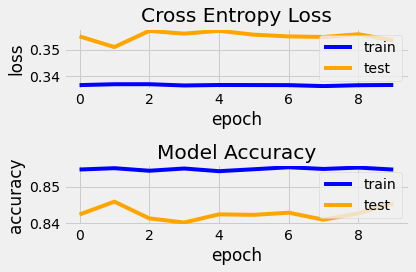

Epoch 1/10
483/483 [==============================] - 1s 2ms/step - loss: 0.3357 - accuracy: 0.8546 - val_loss: 0.3592 - val_accuracy: 0.8406
Epoch 2/10
483/483 [==============================] - 1s 2ms/step - loss: 0.3370 - accuracy: 0.8550 - val_loss: 0.3566 - val_accuracy: 0.8411
Epoch 3/10
483/483 [==============================] - 1s 2ms/step - loss: 0.3360 - accuracy: 0.8552 - val_loss: 0.3572 - val_accuracy: 0.8407
Epoch 4/10
483/483 [==============================] - 1s 2ms/step - loss: 0.3361 - accuracy: 0.8557 - val_loss: 0.3602 - val_accuracy: 0.8426
Epoch 5/10
483/483 [==============================] - 1s 2ms/step - loss: 0.3360 - accuracy: 0.8550 - val_loss: 0.3578 - val_accuracy: 0.8392
Epoch 6/10
483/483 [==============================] - 1s 2ms/step - loss: 0.3356 - accuracy: 0.8555 - val_loss: 0.3572 - val_accuracy: 0.8425
Epoch 7/10
483/483 [==============================] - 1s 2ms/step - loss: 0.3360 - accuracy: 0.8553 - val_loss: 0.3566 - val_accuracy: 0.8403
Epoch 

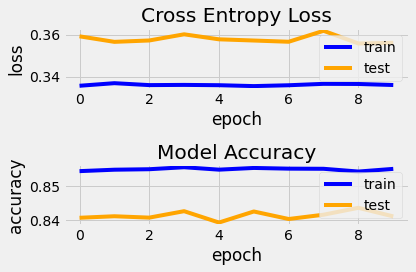

Epoch 1/10
483/483 [==============================] - 1s 2ms/step - loss: 0.3360 - accuracy: 0.8553 - val_loss: 0.3588 - val_accuracy: 0.8408
Epoch 2/10
483/483 [==============================] - 1s 2ms/step - loss: 0.3360 - accuracy: 0.8552 - val_loss: 0.3639 - val_accuracy: 0.8409
Epoch 3/10
483/483 [==============================] - 1s 2ms/step - loss: 0.3360 - accuracy: 0.8548 - val_loss: 0.3560 - val_accuracy: 0.8414
Epoch 4/10
483/483 [==============================] - 1s 2ms/step - loss: 0.3359 - accuracy: 0.8558 - val_loss: 0.3565 - val_accuracy: 0.8423
Epoch 5/10
483/483 [==============================] - 1s 2ms/step - loss: 0.3363 - accuracy: 0.8553 - val_loss: 0.3546 - val_accuracy: 0.8434
Epoch 6/10
483/483 [==============================] - 1s 2ms/step - loss: 0.3355 - accuracy: 0.8551 - val_loss: 0.3562 - val_accuracy: 0.8433
Epoch 7/10
483/483 [==============================] - 1s 2ms/step - loss: 0.3359 - accuracy: 0.8558 - val_loss: 0.3556 - val_accuracy: 0.8440
Epoch 

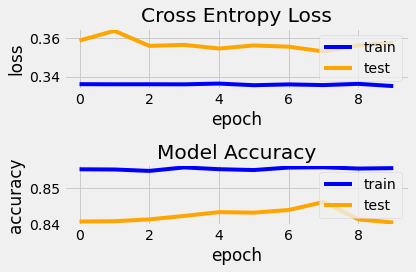

[[0.35364794731140137, 0.8438058495521545], [0.35485920310020447, 0.8449057936668396], [0.35555562376976013, 0.8441725373268127], [0.3572545349597931, 0.8409184813499451], [0.35690557956695557, 0.8418809175491333], [0.3518649935722351, 0.8445850014686584], [0.35344836115837097, 0.8435766696929932], [0.3535158634185791, 0.8454557657241821], [0.35610753297805786, 0.8410559892654419], [0.3575231730937958, 0.8405059576034546]]
Mean Accuracy: 0.84% 
Model # 1
Epoch 1/10
483/483 [==============================] - 2s 3ms/step - loss: 0.3852 - accuracy: 0.8318 - val_loss: 0.3577 - val_accuracy: 0.8438
Epoch 2/10
483/483 [==============================] - 1s 3ms/step - loss: 0.3592 - accuracy: 0.8447 - val_loss: 0.3529 - val_accuracy: 0.8450
Epoch 3/10
483/483 [==============================] - 1s 3ms/step - loss: 0.3548 - accuracy: 0.8468 - val_loss: 0.3526 - val_accuracy: 0.8444
Epoch 4/10
483/483 [==============================] - 1s 3ms/step - loss: 0.3522 - accuracy: 0.8484 - val_loss: 0.3

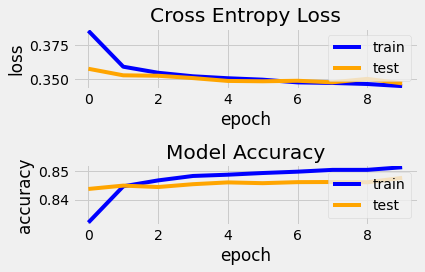

Epoch 1/10
483/483 [==============================] - 1s 3ms/step - loss: 0.3447 - accuracy: 0.8514 - val_loss: 0.3510 - val_accuracy: 0.8455
Epoch 2/10
483/483 [==============================] - 1s 3ms/step - loss: 0.3452 - accuracy: 0.8523 - val_loss: 0.3480 - val_accuracy: 0.8467
Epoch 3/10
483/483 [==============================] - 1s 3ms/step - loss: 0.3432 - accuracy: 0.8526 - val_loss: 0.3477 - val_accuracy: 0.8475
Epoch 4/10
483/483 [==============================] - 1s 3ms/step - loss: 0.3433 - accuracy: 0.8530 - val_loss: 0.3482 - val_accuracy: 0.8474
Epoch 5/10
483/483 [==============================] - 1s 3ms/step - loss: 0.3427 - accuracy: 0.8524 - val_loss: 0.3488 - val_accuracy: 0.8483
Epoch 6/10
483/483 [==============================] - 1s 3ms/step - loss: 0.3426 - accuracy: 0.8525 - val_loss: 0.3451 - val_accuracy: 0.8492
Epoch 7/10
483/483 [==============================] - 2s 3ms/step - loss: 0.3418 - accuracy: 0.8528 - val_loss: 0.3471 - val_accuracy: 0.8482
Epoch 

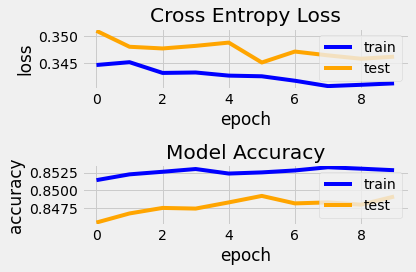

Epoch 1/10
483/483 [==============================] - 1s 3ms/step - loss: 0.3408 - accuracy: 0.8529 - val_loss: 0.3478 - val_accuracy: 0.8465
Epoch 2/10
483/483 [==============================] - 1s 3ms/step - loss: 0.3399 - accuracy: 0.8543 - val_loss: 0.3477 - val_accuracy: 0.8460
Epoch 3/10
483/483 [==============================] - 1s 3ms/step - loss: 0.3401 - accuracy: 0.8539 - val_loss: 0.3482 - val_accuracy: 0.8483
Epoch 4/10
483/483 [==============================] - 1s 3ms/step - loss: 0.3396 - accuracy: 0.8543 - val_loss: 0.3499 - val_accuracy: 0.8455
Epoch 5/10
483/483 [==============================] - 1s 3ms/step - loss: 0.3393 - accuracy: 0.8536 - val_loss: 0.3470 - val_accuracy: 0.8474
Epoch 6/10
483/483 [==============================] - 1s 3ms/step - loss: 0.3386 - accuracy: 0.8545 - val_loss: 0.3492 - val_accuracy: 0.8474
Epoch 7/10
483/483 [==============================] - 1s 3ms/step - loss: 0.3382 - accuracy: 0.8544 - val_loss: 0.3476 - val_accuracy: 0.8471
Epoch 

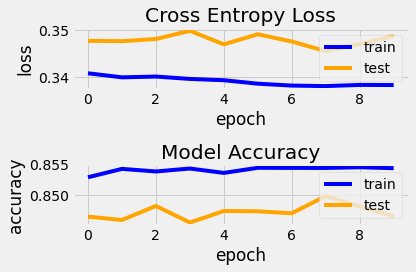

Epoch 1/10
483/483 [==============================] - 1s 3ms/step - loss: 0.3372 - accuracy: 0.8549 - val_loss: 0.3499 - val_accuracy: 0.8443
Epoch 2/10
483/483 [==============================] - 1s 3ms/step - loss: 0.3371 - accuracy: 0.8550 - val_loss: 0.3489 - val_accuracy: 0.8454
Epoch 3/10
483/483 [==============================] - 1s 3ms/step - loss: 0.3367 - accuracy: 0.8557 - val_loss: 0.3471 - val_accuracy: 0.8477
Epoch 4/10
483/483 [==============================] - 1s 3ms/step - loss: 0.3368 - accuracy: 0.8547 - val_loss: 0.3494 - val_accuracy: 0.8445
Epoch 5/10
483/483 [==============================] - 1s 3ms/step - loss: 0.3364 - accuracy: 0.8556 - val_loss: 0.3487 - val_accuracy: 0.8483
Epoch 6/10
483/483 [==============================] - 1s 3ms/step - loss: 0.3365 - accuracy: 0.8554 - val_loss: 0.3501 - val_accuracy: 0.8461
Epoch 7/10
483/483 [==============================] - 1s 3ms/step - loss: 0.3361 - accuracy: 0.8555 - val_loss: 0.3511 - val_accuracy: 0.8463
Epoch 

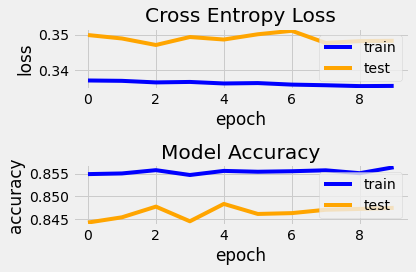

Epoch 1/10
483/483 [==============================] - 3s 6ms/step - loss: 0.3356 - accuracy: 0.8559 - val_loss: 0.3516 - val_accuracy: 0.8476
Epoch 2/10
483/483 [==============================] - 2s 4ms/step - loss: 0.3356 - accuracy: 0.8560 - val_loss: 0.3485 - val_accuracy: 0.8470
Epoch 3/10
483/483 [==============================] - 1s 3ms/step - loss: 0.3351 - accuracy: 0.8558 - val_loss: 0.3496 - val_accuracy: 0.8466
Epoch 4/10
483/483 [==============================] - 1s 3ms/step - loss: 0.3351 - accuracy: 0.8558 - val_loss: 0.3502 - val_accuracy: 0.8449
Epoch 5/10
483/483 [==============================] - 1s 3ms/step - loss: 0.3346 - accuracy: 0.8558 - val_loss: 0.3489 - val_accuracy: 0.8464
Epoch 6/10
483/483 [==============================] - 1s 3ms/step - loss: 0.3348 - accuracy: 0.8559 - val_loss: 0.3490 - val_accuracy: 0.8452
Epoch 7/10
483/483 [==============================] - 1s 3ms/step - loss: 0.3340 - accuracy: 0.8562 - val_loss: 0.3483 - val_accuracy: 0.8465
Epoch 

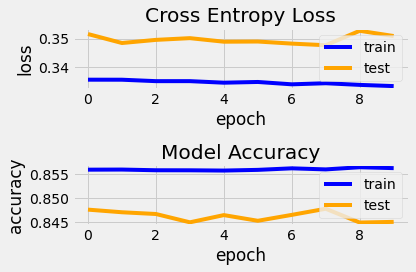

Epoch 1/10
483/483 [==============================] - 1s 3ms/step - loss: 0.3337 - accuracy: 0.8563 - val_loss: 0.3519 - val_accuracy: 0.8441
Epoch 2/10
483/483 [==============================] - 1s 3ms/step - loss: 0.3335 - accuracy: 0.8565 - val_loss: 0.3514 - val_accuracy: 0.8468
Epoch 3/10
483/483 [==============================] - 1s 3ms/step - loss: 0.3333 - accuracy: 0.8562 - val_loss: 0.3495 - val_accuracy: 0.8455
Epoch 4/10
483/483 [==============================] - 1s 3ms/step - loss: 0.3336 - accuracy: 0.8570 - val_loss: 0.3540 - val_accuracy: 0.8437
Epoch 5/10
483/483 [==============================] - 1s 3ms/step - loss: 0.3328 - accuracy: 0.8567 - val_loss: 0.3527 - val_accuracy: 0.8428
Epoch 6/10
483/483 [==============================] - 1s 3ms/step - loss: 0.3333 - accuracy: 0.8572 - val_loss: 0.3493 - val_accuracy: 0.8463
Epoch 7/10
483/483 [==============================] - 1s 3ms/step - loss: 0.3324 - accuracy: 0.8574 - val_loss: 0.3503 - val_accuracy: 0.8477
Epoch 

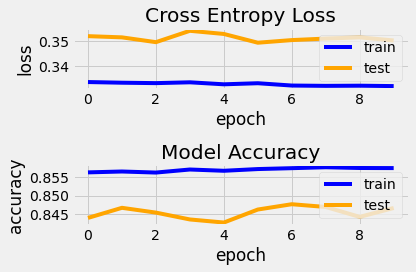

Epoch 1/10
483/483 [==============================] - 1s 3ms/step - loss: 0.3316 - accuracy: 0.8570 - val_loss: 0.3489 - val_accuracy: 0.8477
Epoch 2/10
483/483 [==============================] - 2s 4ms/step - loss: 0.3322 - accuracy: 0.8569 - val_loss: 0.3514 - val_accuracy: 0.8451
Epoch 3/10
483/483 [==============================] - 2s 3ms/step - loss: 0.3318 - accuracy: 0.8564 - val_loss: 0.3501 - val_accuracy: 0.8461
Epoch 4/10
483/483 [==============================] - 1s 3ms/step - loss: 0.3322 - accuracy: 0.8570 - val_loss: 0.3505 - val_accuracy: 0.8471
Epoch 5/10
483/483 [==============================] - 1s 3ms/step - loss: 0.3315 - accuracy: 0.8575 - val_loss: 0.3522 - val_accuracy: 0.8452
Epoch 6/10
483/483 [==============================] - 1s 3ms/step - loss: 0.3310 - accuracy: 0.8568 - val_loss: 0.3519 - val_accuracy: 0.8440
Epoch 7/10
483/483 [==============================] - 1s 3ms/step - loss: 0.3316 - accuracy: 0.8575 - val_loss: 0.3492 - val_accuracy: 0.8446
Epoch 

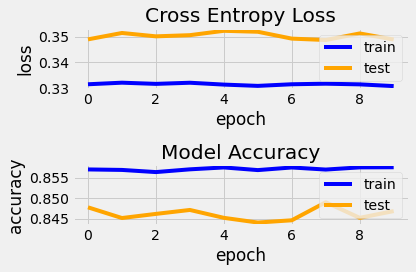

Epoch 1/10
483/483 [==============================] - 1s 3ms/step - loss: 0.3314 - accuracy: 0.8577 - val_loss: 0.3497 - val_accuracy: 0.8460
Epoch 2/10
483/483 [==============================] - 1s 3ms/step - loss: 0.3306 - accuracy: 0.8576 - val_loss: 0.3536 - val_accuracy: 0.8436
Epoch 3/10
483/483 [==============================] - 1s 3ms/step - loss: 0.3309 - accuracy: 0.8577 - val_loss: 0.3531 - val_accuracy: 0.8479
Epoch 4/10
483/483 [==============================] - 2s 3ms/step - loss: 0.3303 - accuracy: 0.8576 - val_loss: 0.3505 - val_accuracy: 0.8485
Epoch 5/10
483/483 [==============================] - 2s 3ms/step - loss: 0.3303 - accuracy: 0.8579 - val_loss: 0.3507 - val_accuracy: 0.8465
Epoch 6/10
483/483 [==============================] - 2s 3ms/step - loss: 0.3299 - accuracy: 0.8575 - val_loss: 0.3500 - val_accuracy: 0.8466
Epoch 7/10
483/483 [==============================] - 1s 3ms/step - loss: 0.3299 - accuracy: 0.8580 - val_loss: 0.3500 - val_accuracy: 0.8472
Epoch 

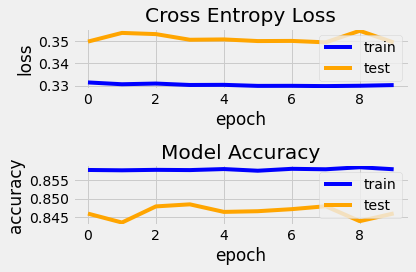

Epoch 1/10
483/483 [==============================] - 1s 3ms/step - loss: 0.3298 - accuracy: 0.8591 - val_loss: 0.3517 - val_accuracy: 0.8458
Epoch 2/10
483/483 [==============================] - 1s 3ms/step - loss: 0.3299 - accuracy: 0.8577 - val_loss: 0.3512 - val_accuracy: 0.8491
Epoch 3/10
483/483 [==============================] - 2s 3ms/step - loss: 0.3293 - accuracy: 0.8576 - val_loss: 0.3511 - val_accuracy: 0.8477
Epoch 4/10
483/483 [==============================] - 1s 3ms/step - loss: 0.3293 - accuracy: 0.8589 - val_loss: 0.3511 - val_accuracy: 0.8476
Epoch 5/10
483/483 [==============================] - 1s 3ms/step - loss: 0.3291 - accuracy: 0.8581 - val_loss: 0.3515 - val_accuracy: 0.8469
Epoch 6/10
483/483 [==============================] - 1s 3ms/step - loss: 0.3282 - accuracy: 0.8582 - val_loss: 0.3518 - val_accuracy: 0.8458
Epoch 7/10
483/483 [==============================] - 1s 3ms/step - loss: 0.3286 - accuracy: 0.8582 - val_loss: 0.3518 - val_accuracy: 0.8454
Epoch 

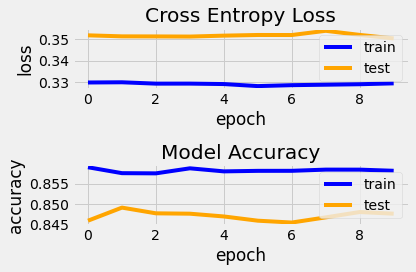

Epoch 1/10
483/483 [==============================] - 2s 3ms/step - loss: 0.3288 - accuracy: 0.8580 - val_loss: 0.3528 - val_accuracy: 0.8455
Epoch 2/10
483/483 [==============================] - 2s 3ms/step - loss: 0.3288 - accuracy: 0.8580 - val_loss: 0.3520 - val_accuracy: 0.8467
Epoch 3/10
483/483 [==============================] - 2s 3ms/step - loss: 0.3284 - accuracy: 0.8589 - val_loss: 0.3502 - val_accuracy: 0.8471
Epoch 4/10
483/483 [==============================] - 2s 4ms/step - loss: 0.3283 - accuracy: 0.8588 - val_loss: 0.3489 - val_accuracy: 0.8476
Epoch 5/10
483/483 [==============================] - 1s 3ms/step - loss: 0.3280 - accuracy: 0.8591 - val_loss: 0.3493 - val_accuracy: 0.8483
Epoch 6/10
483/483 [==============================] - 1s 3ms/step - loss: 0.3279 - accuracy: 0.8591 - val_loss: 0.3510 - val_accuracy: 0.8480
Epoch 7/10
483/483 [==============================] - 2s 4ms/step - loss: 0.3269 - accuracy: 0.8588 - val_loss: 0.3516 - val_accuracy: 0.8464
Epoch 

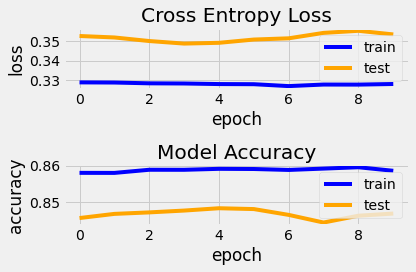

[[0.3470732569694519, 0.8477015495300293], [0.34619706869125366, 0.8491223454475403], [0.34878599643707275, 0.846555769443512], [0.3483111262321472, 0.8474723696708679], [0.3509054183959961, 0.8449974656105042], [0.3501752018928528, 0.8467390537261963], [0.34886282682418823, 0.8468307256698608], [0.3493252098560333, 0.8460516333580017], [0.3502231240272522, 0.8475640416145325], [0.35359063744544983, 0.8467848896980286]]
Mean Accuracy: 0.85% 
Model # 1
Epoch 1/10
483/483 [==============================] - 5s 7ms/step - loss: 0.3819 - accuracy: 0.8340 - val_loss: 0.3564 - val_accuracy: 0.8427
Epoch 2/10
483/483 [==============================] - 2s 5ms/step - loss: 0.3557 - accuracy: 0.8464 - val_loss: 0.3520 - val_accuracy: 0.8444
Epoch 3/10
483/483 [==============================] - 3s 6ms/step - loss: 0.3518 - accuracy: 0.8489 - val_loss: 0.3505 - val_accuracy: 0.8452
Epoch 4/10
483/483 [==============================] - 3s 6ms/step - loss: 0.3498 - accuracy: 0.8487 - val_loss: 0.3495

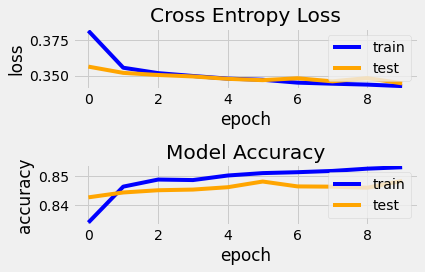

Epoch 1/10
483/483 [==============================] - 2s 5ms/step - loss: 0.3423 - accuracy: 0.8530 - val_loss: 0.3446 - val_accuracy: 0.8489
Epoch 2/10
483/483 [==============================] - 2s 5ms/step - loss: 0.3412 - accuracy: 0.8535 - val_loss: 0.3444 - val_accuracy: 0.8489
Epoch 3/10
483/483 [==============================] - 2s 5ms/step - loss: 0.3406 - accuracy: 0.8535 - val_loss: 0.3452 - val_accuracy: 0.8487
Epoch 4/10
483/483 [==============================] - 2s 5ms/step - loss: 0.3396 - accuracy: 0.8547 - val_loss: 0.3437 - val_accuracy: 0.8486
Epoch 5/10
483/483 [==============================] - 2s 5ms/step - loss: 0.3395 - accuracy: 0.8536 - val_loss: 0.3437 - val_accuracy: 0.8487
Epoch 6/10
483/483 [==============================] - 2s 5ms/step - loss: 0.3387 - accuracy: 0.8547 - val_loss: 0.3432 - val_accuracy: 0.8491
Epoch 7/10
483/483 [==============================] - 3s 5ms/step - loss: 0.3384 - accuracy: 0.8549 - val_loss: 0.3432 - val_accuracy: 0.8501
Epoch 

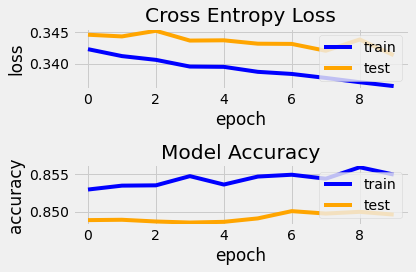

Epoch 1/10
483/483 [==============================] - 2s 5ms/step - loss: 0.3363 - accuracy: 0.8561 - val_loss: 0.3422 - val_accuracy: 0.8485
Epoch 2/10
483/483 [==============================] - 3s 5ms/step - loss: 0.3359 - accuracy: 0.8564 - val_loss: 0.3440 - val_accuracy: 0.8486
Epoch 3/10
483/483 [==============================] - 2s 5ms/step - loss: 0.3354 - accuracy: 0.8565 - val_loss: 0.3441 - val_accuracy: 0.8497
Epoch 4/10
483/483 [==============================] - 2s 5ms/step - loss: 0.3349 - accuracy: 0.8564 - val_loss: 0.3425 - val_accuracy: 0.8488
Epoch 5/10
483/483 [==============================] - 2s 5ms/step - loss: 0.3345 - accuracy: 0.8564 - val_loss: 0.3427 - val_accuracy: 0.8489
Epoch 6/10
483/483 [==============================] - 2s 5ms/step - loss: 0.3342 - accuracy: 0.8564 - val_loss: 0.3407 - val_accuracy: 0.8515
Epoch 7/10
483/483 [==============================] - 3s 5ms/step - loss: 0.3335 - accuracy: 0.8578 - val_loss: 0.3416 - val_accuracy: 0.8500
Epoch 

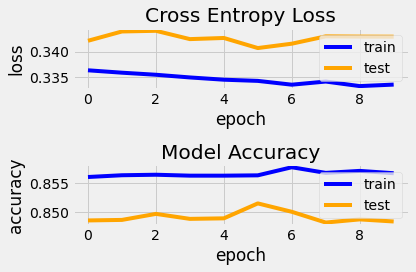

Epoch 1/10
483/483 [==============================] - 3s 5ms/step - loss: 0.3326 - accuracy: 0.8572 - val_loss: 0.3473 - val_accuracy: 0.8464
Epoch 2/10
483/483 [==============================] - 2s 5ms/step - loss: 0.3322 - accuracy: 0.8580 - val_loss: 0.3430 - val_accuracy: 0.8483
Epoch 3/10
483/483 [==============================] - 2s 5ms/step - loss: 0.3319 - accuracy: 0.8583 - val_loss: 0.3450 - val_accuracy: 0.8460
Epoch 4/10
483/483 [==============================] - 2s 5ms/step - loss: 0.3313 - accuracy: 0.8576 - val_loss: 0.3440 - val_accuracy: 0.8476
Epoch 5/10
483/483 [==============================] - 2s 5ms/step - loss: 0.3309 - accuracy: 0.8578 - val_loss: 0.3455 - val_accuracy: 0.8458
Epoch 6/10
483/483 [==============================] - 3s 5ms/step - loss: 0.3313 - accuracy: 0.8579 - val_loss: 0.3434 - val_accuracy: 0.8462
Epoch 7/10
483/483 [==============================] - 3s 5ms/step - loss: 0.3310 - accuracy: 0.8588 - val_loss: 0.3428 - val_accuracy: 0.8493
Epoch 

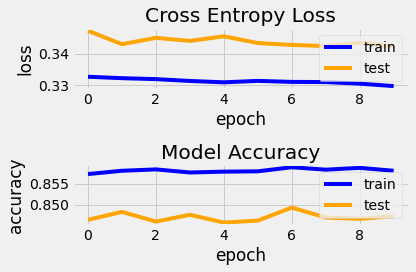

Epoch 1/10
483/483 [==============================] - 3s 5ms/step - loss: 0.3298 - accuracy: 0.8585 - val_loss: 0.3460 - val_accuracy: 0.8455
Epoch 2/10
483/483 [==============================] - 3s 5ms/step - loss: 0.3292 - accuracy: 0.8595 - val_loss: 0.3432 - val_accuracy: 0.8482
Epoch 3/10
483/483 [==============================] - 3s 5ms/step - loss: 0.3287 - accuracy: 0.8594 - val_loss: 0.3454 - val_accuracy: 0.8451
Epoch 4/10
483/483 [==============================] - 3s 5ms/step - loss: 0.3286 - accuracy: 0.8594 - val_loss: 0.3428 - val_accuracy: 0.8491
Epoch 5/10
483/483 [==============================] - 2s 5ms/step - loss: 0.3284 - accuracy: 0.8592 - val_loss: 0.3441 - val_accuracy: 0.8469
Epoch 6/10
483/483 [==============================] - 2s 5ms/step - loss: 0.3280 - accuracy: 0.8594 - val_loss: 0.3426 - val_accuracy: 0.8490
Epoch 7/10
483/483 [==============================] - 3s 5ms/step - loss: 0.3282 - accuracy: 0.8594 - val_loss: 0.3429 - val_accuracy: 0.8484
Epoch 

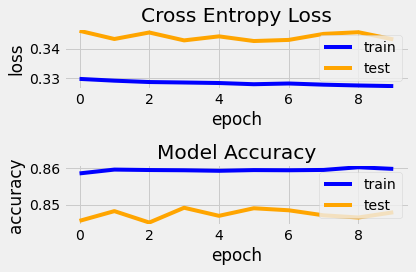

Epoch 1/10
483/483 [==============================] - 3s 5ms/step - loss: 0.3270 - accuracy: 0.8596 - val_loss: 0.3447 - val_accuracy: 0.8459
Epoch 2/10
483/483 [==============================] - 3s 5ms/step - loss: 0.3271 - accuracy: 0.8596 - val_loss: 0.3439 - val_accuracy: 0.8473
Epoch 3/10
483/483 [==============================] - 3s 6ms/step - loss: 0.3264 - accuracy: 0.8603 - val_loss: 0.3421 - val_accuracy: 0.8483
Epoch 4/10
483/483 [==============================] - 3s 6ms/step - loss: 0.3266 - accuracy: 0.8602 - val_loss: 0.3453 - val_accuracy: 0.8461
Epoch 5/10
483/483 [==============================] - 3s 5ms/step - loss: 0.3264 - accuracy: 0.8601 - val_loss: 0.3469 - val_accuracy: 0.8449
Epoch 6/10
483/483 [==============================] - 3s 5ms/step - loss: 0.3251 - accuracy: 0.8603 - val_loss: 0.3430 - val_accuracy: 0.8486
Epoch 7/10
483/483 [==============================] - 2s 5ms/step - loss: 0.3254 - accuracy: 0.8606 - val_loss: 0.3440 - val_accuracy: 0.8477
Epoch 

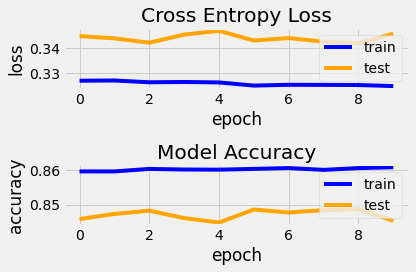

Epoch 1/10
483/483 [==============================] - 3s 5ms/step - loss: 0.3241 - accuracy: 0.8614 - val_loss: 0.3458 - val_accuracy: 0.8457
Epoch 2/10
483/483 [==============================] - 3s 6ms/step - loss: 0.3246 - accuracy: 0.8609 - val_loss: 0.3437 - val_accuracy: 0.8493
Epoch 3/10
483/483 [==============================] - 3s 5ms/step - loss: 0.3248 - accuracy: 0.8609 - val_loss: 0.3467 - val_accuracy: 0.8466
Epoch 4/10
483/483 [==============================] - 2s 5ms/step - loss: 0.3238 - accuracy: 0.8605 - val_loss: 0.3473 - val_accuracy: 0.8442
Epoch 5/10
483/483 [==============================] - 2s 5ms/step - loss: 0.3237 - accuracy: 0.8615 - val_loss: 0.3424 - val_accuracy: 0.8486
Epoch 6/10
483/483 [==============================] - 3s 5ms/step - loss: 0.3239 - accuracy: 0.8612 - val_loss: 0.3439 - val_accuracy: 0.8473
Epoch 7/10
483/483 [==============================] - 2s 5ms/step - loss: 0.3233 - accuracy: 0.8619 - val_loss: 0.3457 - val_accuracy: 0.8453
Epoch 

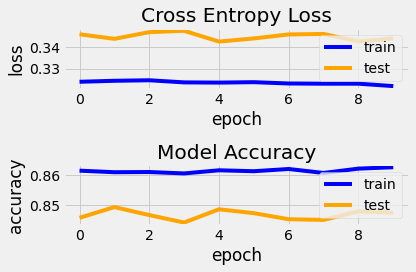

Epoch 1/10
483/483 [==============================] - 2s 5ms/step - loss: 0.3224 - accuracy: 0.8616 - val_loss: 0.3431 - val_accuracy: 0.8473
Epoch 2/10
483/483 [==============================] - 2s 5ms/step - loss: 0.3228 - accuracy: 0.8620 - val_loss: 0.3432 - val_accuracy: 0.8475
Epoch 3/10
483/483 [==============================] - 2s 5ms/step - loss: 0.3220 - accuracy: 0.8620 - val_loss: 0.3436 - val_accuracy: 0.8474
Epoch 4/10
483/483 [==============================] - 2s 5ms/step - loss: 0.3221 - accuracy: 0.8615 - val_loss: 0.3448 - val_accuracy: 0.8466
Epoch 5/10
483/483 [==============================] - 2s 5ms/step - loss: 0.3220 - accuracy: 0.8616 - val_loss: 0.3448 - val_accuracy: 0.8470
Epoch 6/10
483/483 [==============================] - 2s 5ms/step - loss: 0.3216 - accuracy: 0.8625 - val_loss: 0.3443 - val_accuracy: 0.8466
Epoch 7/10
483/483 [==============================] - 2s 5ms/step - loss: 0.3207 - accuracy: 0.8631 - val_loss: 0.3453 - val_accuracy: 0.8466
Epoch 

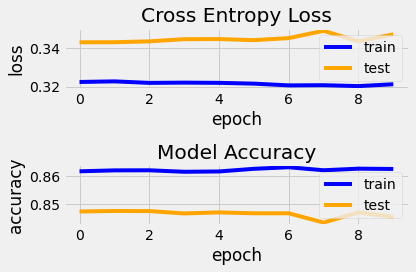

Epoch 1/10
483/483 [==============================] - 2s 5ms/step - loss: 0.3205 - accuracy: 0.8636 - val_loss: 0.3463 - val_accuracy: 0.8455
Epoch 2/10
483/483 [==============================] - 2s 5ms/step - loss: 0.3198 - accuracy: 0.8630 - val_loss: 0.3454 - val_accuracy: 0.8467
Epoch 3/10
483/483 [==============================] - 3s 5ms/step - loss: 0.3198 - accuracy: 0.8625 - val_loss: 0.3454 - val_accuracy: 0.8451
Epoch 4/10
483/483 [==============================] - 3s 6ms/step - loss: 0.3200 - accuracy: 0.8632 - val_loss: 0.3449 - val_accuracy: 0.8469
Epoch 5/10
483/483 [==============================] - 3s 6ms/step - loss: 0.3192 - accuracy: 0.8637 - val_loss: 0.3454 - val_accuracy: 0.8470
Epoch 6/10
483/483 [==============================] - 3s 5ms/step - loss: 0.3194 - accuracy: 0.8634 - val_loss: 0.3457 - val_accuracy: 0.8475
Epoch 7/10
483/483 [==============================] - 3s 5ms/step - loss: 0.3193 - accuracy: 0.8621 - val_loss: 0.3471 - val_accuracy: 0.8451
Epoch 

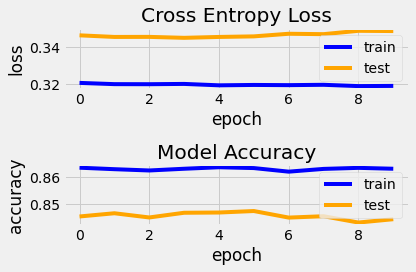

Epoch 1/10
483/483 [==============================] - 3s 5ms/step - loss: 0.3188 - accuracy: 0.8634 - val_loss: 0.3458 - val_accuracy: 0.8456
Epoch 2/10
483/483 [==============================] - 3s 6ms/step - loss: 0.3184 - accuracy: 0.8634 - val_loss: 0.3488 - val_accuracy: 0.8438
Epoch 3/10
483/483 [==============================] - 3s 6ms/step - loss: 0.3185 - accuracy: 0.8637 - val_loss: 0.3493 - val_accuracy: 0.8431
Epoch 4/10
483/483 [==============================] - 3s 5ms/step - loss: 0.3182 - accuracy: 0.8644 - val_loss: 0.3518 - val_accuracy: 0.8423
Epoch 5/10
483/483 [==============================] - 3s 6ms/step - loss: 0.3180 - accuracy: 0.8635 - val_loss: 0.3477 - val_accuracy: 0.8442
Epoch 6/10
483/483 [==============================] - 3s 6ms/step - loss: 0.3174 - accuracy: 0.8634 - val_loss: 0.3453 - val_accuracy: 0.8463
Epoch 7/10
483/483 [==============================] - 3s 5ms/step - loss: 0.3173 - accuracy: 0.8640 - val_loss: 0.3476 - val_accuracy: 0.8444
Epoch 

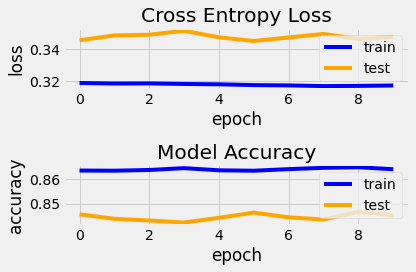

[[0.34454798698425293, 0.8484348654747009], [0.3413694500923157, 0.8496264815330505], [0.34295544028282166, 0.8483431935310364], [0.3422996997833252, 0.8472890853881836], [0.34310606122016907, 0.8478848934173584], [0.34567973017692566, 0.8453641533851624], [0.3438950181007385, 0.8473806977272034], [0.34729546308517456, 0.8453641533851624], [0.34860092401504517, 0.8444933295249939], [0.3478999435901642, 0.8452266454696655]]
Mean Accuracy: 0.85% 
Model # 1
Epoch 1/10
483/483 [==============================] - 5s 6ms/step - loss: 0.3891 - accuracy: 0.8261 - val_loss: 0.3595 - val_accuracy: 0.8428
Epoch 2/10
483/483 [==============================] - 3s 5ms/step - loss: 0.3574 - accuracy: 0.8457 - val_loss: 0.3550 - val_accuracy: 0.8449
Epoch 3/10
483/483 [==============================] - 3s 5ms/step - loss: 0.3542 - accuracy: 0.8474 - val_loss: 0.3531 - val_accuracy: 0.8441
Epoch 4/10
483/483 [==============================] - 3s 5ms/step - loss: 0.3509 - accuracy: 0.8488 - val_loss: 0.3

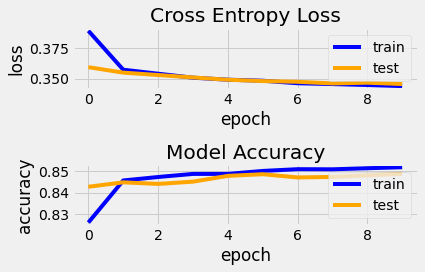

Epoch 1/10
483/483 [==============================] - 3s 6ms/step - loss: 0.3432 - accuracy: 0.8520 - val_loss: 0.3450 - val_accuracy: 0.8497
Epoch 2/10
483/483 [==============================] - 3s 5ms/step - loss: 0.3423 - accuracy: 0.8533 - val_loss: 0.3456 - val_accuracy: 0.8484
Epoch 3/10
483/483 [==============================] - 3s 5ms/step - loss: 0.3416 - accuracy: 0.8535 - val_loss: 0.3447 - val_accuracy: 0.8506
Epoch 4/10
483/483 [==============================] - 2s 5ms/step - loss: 0.3410 - accuracy: 0.8538 - val_loss: 0.3449 - val_accuracy: 0.8495
Epoch 5/10
483/483 [==============================] - 3s 5ms/step - loss: 0.3407 - accuracy: 0.8537 - val_loss: 0.3441 - val_accuracy: 0.8505
Epoch 6/10
483/483 [==============================] - 3s 5ms/step - loss: 0.3405 - accuracy: 0.8538 - val_loss: 0.3433 - val_accuracy: 0.8505
Epoch 7/10
483/483 [==============================] - 3s 5ms/step - loss: 0.3394 - accuracy: 0.8544 - val_loss: 0.3441 - val_accuracy: 0.8498
Epoch 

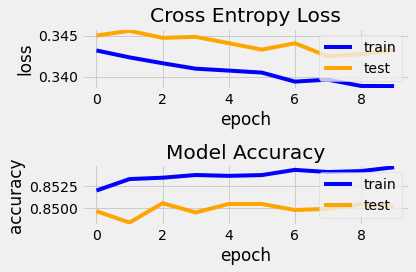

Epoch 1/10
483/483 [==============================] - 3s 5ms/step - loss: 0.3379 - accuracy: 0.8549 - val_loss: 0.3414 - val_accuracy: 0.8509
Epoch 2/10
483/483 [==============================] - 3s 5ms/step - loss: 0.3374 - accuracy: 0.8545 - val_loss: 0.3434 - val_accuracy: 0.8501
Epoch 3/10
483/483 [==============================] - 3s 5ms/step - loss: 0.3376 - accuracy: 0.8550 - val_loss: 0.3425 - val_accuracy: 0.8511
Epoch 4/10
483/483 [==============================] - 3s 6ms/step - loss: 0.3372 - accuracy: 0.8553 - val_loss: 0.3426 - val_accuracy: 0.8509
Epoch 5/10
483/483 [==============================] - 4s 8ms/step - loss: 0.3366 - accuracy: 0.8559 - val_loss: 0.3416 - val_accuracy: 0.8518
Epoch 6/10
483/483 [==============================] - 3s 6ms/step - loss: 0.3359 - accuracy: 0.8555 - val_loss: 0.3415 - val_accuracy: 0.8509
Epoch 7/10
483/483 [==============================] - 3s 6ms/step - loss: 0.3353 - accuracy: 0.8555 - val_loss: 0.3406 - val_accuracy: 0.8528
Epoch 

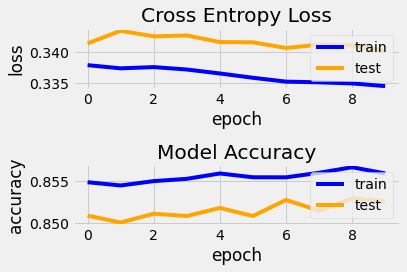

Epoch 1/10
483/483 [==============================] - 3s 6ms/step - loss: 0.3345 - accuracy: 0.8562 - val_loss: 0.3424 - val_accuracy: 0.8509
Epoch 2/10
483/483 [==============================] - 3s 6ms/step - loss: 0.3346 - accuracy: 0.8560 - val_loss: 0.3401 - val_accuracy: 0.8519
Epoch 3/10
483/483 [==============================] - 3s 6ms/step - loss: 0.3339 - accuracy: 0.8569 - val_loss: 0.3405 - val_accuracy: 0.8520
Epoch 4/10
483/483 [==============================] - 3s 6ms/step - loss: 0.3332 - accuracy: 0.8571 - val_loss: 0.3437 - val_accuracy: 0.8506
Epoch 5/10
483/483 [==============================] - 3s 6ms/step - loss: 0.3328 - accuracy: 0.8571 - val_loss: 0.3417 - val_accuracy: 0.8504
Epoch 6/10
483/483 [==============================] - 3s 6ms/step - loss: 0.3327 - accuracy: 0.8572 - val_loss: 0.3407 - val_accuracy: 0.8524
Epoch 7/10
483/483 [==============================] - 3s 6ms/step - loss: 0.3325 - accuracy: 0.8574 - val_loss: 0.3394 - val_accuracy: 0.8515
Epoch 

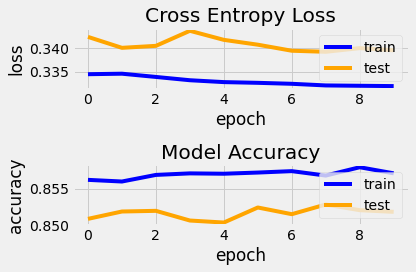

Epoch 1/10
483/483 [==============================] - 3s 6ms/step - loss: 0.3314 - accuracy: 0.8575 - val_loss: 0.3401 - val_accuracy: 0.8524
Epoch 2/10
483/483 [==============================] - 3s 6ms/step - loss: 0.3308 - accuracy: 0.8582 - val_loss: 0.3396 - val_accuracy: 0.8527
Epoch 3/10
483/483 [==============================] - 3s 6ms/step - loss: 0.3313 - accuracy: 0.8574 - val_loss: 0.3399 - val_accuracy: 0.8515
Epoch 4/10
483/483 [==============================] - 3s 6ms/step - loss: 0.3306 - accuracy: 0.8584 - val_loss: 0.3387 - val_accuracy: 0.8527
Epoch 5/10
483/483 [==============================] - 3s 6ms/step - loss: 0.3303 - accuracy: 0.8588 - val_loss: 0.3386 - val_accuracy: 0.8528
Epoch 6/10
483/483 [==============================] - 3s 6ms/step - loss: 0.3305 - accuracy: 0.8583 - val_loss: 0.3387 - val_accuracy: 0.8525
Epoch 7/10
483/483 [==============================] - 3s 6ms/step - loss: 0.3299 - accuracy: 0.8583 - val_loss: 0.3398 - val_accuracy: 0.8522
Epoch 

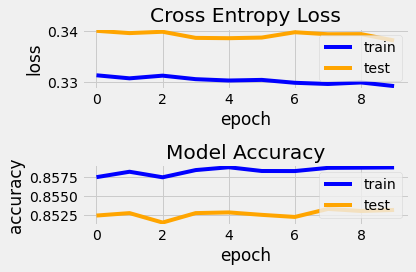

Epoch 1/10
483/483 [==============================] - 3s 6ms/step - loss: 0.3287 - accuracy: 0.8591 - val_loss: 0.3392 - val_accuracy: 0.8512
Epoch 2/10
483/483 [==============================] - 3s 6ms/step - loss: 0.3290 - accuracy: 0.8587 - val_loss: 0.3392 - val_accuracy: 0.8520
Epoch 3/10
483/483 [==============================] - 3s 6ms/step - loss: 0.3288 - accuracy: 0.8590 - val_loss: 0.3394 - val_accuracy: 0.8527
Epoch 4/10
483/483 [==============================] - 3s 6ms/step - loss: 0.3291 - accuracy: 0.8583 - val_loss: 0.3409 - val_accuracy: 0.8516
Epoch 5/10
483/483 [==============================] - 3s 6ms/step - loss: 0.3281 - accuracy: 0.8598 - val_loss: 0.3392 - val_accuracy: 0.8530
Epoch 6/10
483/483 [==============================] - 3s 6ms/step - loss: 0.3286 - accuracy: 0.8590 - val_loss: 0.3387 - val_accuracy: 0.8529
Epoch 7/10
483/483 [==============================] - 3s 6ms/step - loss: 0.3279 - accuracy: 0.8597 - val_loss: 0.3387 - val_accuracy: 0.8524
Epoch 

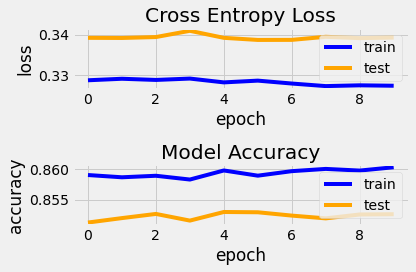

Epoch 1/10
483/483 [==============================] - 3s 6ms/step - loss: 0.3265 - accuracy: 0.8605 - val_loss: 0.3385 - val_accuracy: 0.8530
Epoch 2/10
483/483 [==============================] - 3s 6ms/step - loss: 0.3264 - accuracy: 0.8602 - val_loss: 0.3384 - val_accuracy: 0.8527
Epoch 3/10
483/483 [==============================] - 3s 6ms/step - loss: 0.3263 - accuracy: 0.8596 - val_loss: 0.3400 - val_accuracy: 0.8521
Epoch 4/10
483/483 [==============================] - 3s 6ms/step - loss: 0.3261 - accuracy: 0.8606 - val_loss: 0.3386 - val_accuracy: 0.8533
Epoch 5/10
483/483 [==============================] - 3s 6ms/step - loss: 0.3263 - accuracy: 0.8600 - val_loss: 0.3401 - val_accuracy: 0.8512
Epoch 6/10
483/483 [==============================] - 3s 6ms/step - loss: 0.3262 - accuracy: 0.8605 - val_loss: 0.3388 - val_accuracy: 0.8529
Epoch 7/10
483/483 [==============================] - 3s 6ms/step - loss: 0.3259 - accuracy: 0.8606 - val_loss: 0.3386 - val_accuracy: 0.8528
Epoch 

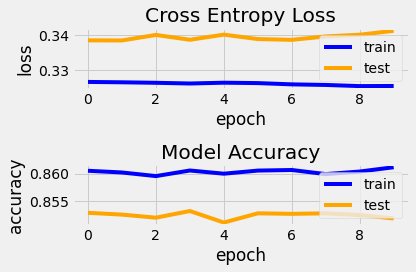

Epoch 1/10
483/483 [==============================] - 3s 6ms/step - loss: 0.3253 - accuracy: 0.8596 - val_loss: 0.3395 - val_accuracy: 0.8527
Epoch 2/10
483/483 [==============================] - 3s 6ms/step - loss: 0.3244 - accuracy: 0.8610 - val_loss: 0.3394 - val_accuracy: 0.8527
Epoch 3/10
483/483 [==============================] - 3s 6ms/step - loss: 0.3242 - accuracy: 0.8606 - val_loss: 0.3396 - val_accuracy: 0.8523
Epoch 4/10
483/483 [==============================] - 3s 6ms/step - loss: 0.3247 - accuracy: 0.8606 - val_loss: 0.3384 - val_accuracy: 0.8522
Epoch 5/10
483/483 [==============================] - 3s 6ms/step - loss: 0.3251 - accuracy: 0.8606 - val_loss: 0.3378 - val_accuracy: 0.8542
Epoch 6/10
483/483 [==============================] - 3s 6ms/step - loss: 0.3241 - accuracy: 0.8609 - val_loss: 0.3381 - val_accuracy: 0.8533
Epoch 7/10
483/483 [==============================] - 3s 6ms/step - loss: 0.3236 - accuracy: 0.8614 - val_loss: 0.3408 - val_accuracy: 0.8521
Epoch 

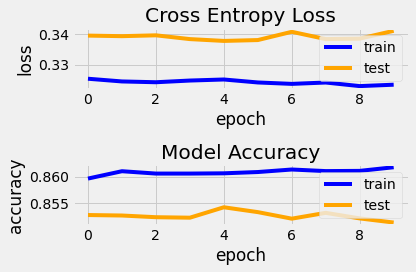

Epoch 1/10
483/483 [==============================] - 3s 6ms/step - loss: 0.3236 - accuracy: 0.8619 - val_loss: 0.3387 - val_accuracy: 0.8516
Epoch 2/10
483/483 [==============================] - 3s 6ms/step - loss: 0.3232 - accuracy: 0.8619 - val_loss: 0.3395 - val_accuracy: 0.8527
Epoch 3/10
483/483 [==============================] - 3s 6ms/step - loss: 0.3237 - accuracy: 0.8611 - val_loss: 0.3406 - val_accuracy: 0.8528
Epoch 4/10
483/483 [==============================] - 3s 6ms/step - loss: 0.3223 - accuracy: 0.8616 - val_loss: 0.3389 - val_accuracy: 0.8526
Epoch 5/10
483/483 [==============================] - 3s 6ms/step - loss: 0.3227 - accuracy: 0.8609 - val_loss: 0.3398 - val_accuracy: 0.8518
Epoch 6/10
483/483 [==============================] - 3s 6ms/step - loss: 0.3225 - accuracy: 0.8619 - val_loss: 0.3419 - val_accuracy: 0.8522
Epoch 7/10
483/483 [==============================] - 3s 6ms/step - loss: 0.3231 - accuracy: 0.8619 - val_loss: 0.3404 - val_accuracy: 0.8532
Epoch 

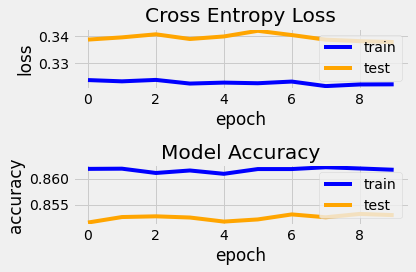

Epoch 1/10
483/483 [==============================] - 3s 6ms/step - loss: 0.3212 - accuracy: 0.8621 - val_loss: 0.3391 - val_accuracy: 0.8527
Epoch 2/10
483/483 [==============================] - 3s 6ms/step - loss: 0.3215 - accuracy: 0.8619 - val_loss: 0.3408 - val_accuracy: 0.8523
Epoch 3/10
483/483 [==============================] - 3s 6ms/step - loss: 0.3209 - accuracy: 0.8624 - val_loss: 0.3383 - val_accuracy: 0.8522
Epoch 4/10
483/483 [==============================] - 3s 6ms/step - loss: 0.3212 - accuracy: 0.8628 - val_loss: 0.3394 - val_accuracy: 0.8527
Epoch 5/10
483/483 [==============================] - 3s 6ms/step - loss: 0.3216 - accuracy: 0.8621 - val_loss: 0.3408 - val_accuracy: 0.8526
Epoch 6/10
483/483 [==============================] - 3s 6ms/step - loss: 0.3206 - accuracy: 0.8619 - val_loss: 0.3404 - val_accuracy: 0.8529
Epoch 7/10
483/483 [==============================] - 3s 6ms/step - loss: 0.3205 - accuracy: 0.8628 - val_loss: 0.3393 - val_accuracy: 0.8525
Epoch 

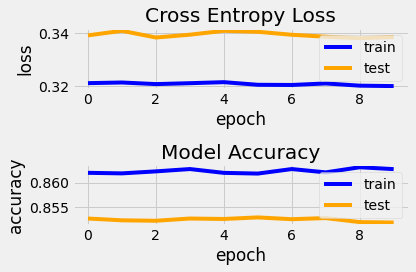

[[0.34575700759887695, 0.8488014936447144], [0.34329140186309814, 0.8502222895622253], [0.34009450674057007, 0.8526055216789246], [0.3395524322986603, 0.8518263697624207], [0.33816999197006226, 0.8531554937362671], [0.3392665982246399, 0.8526055216789246], [0.3411863148212433, 0.8519638776779175], [0.3411293625831604, 0.8513222336769104], [0.337766170501709, 0.8530179858207703], [0.33847683668136597, 0.8518263697624207]]
Mean Accuracy: 0.85% 
Model # 1
Epoch 1/10
483/483 [==============================] - 19s 32ms/step - loss: 0.3743 - accuracy: 0.8389 - val_loss: 0.3618 - val_accuracy: 0.8443
Epoch 2/10
483/483 [==============================] - 15s 31ms/step - loss: 0.3550 - accuracy: 0.8476 - val_loss: 0.3538 - val_accuracy: 0.8470
Epoch 3/10
483/483 [==============================] - 15s 31ms/step - loss: 0.3509 - accuracy: 0.8494 - val_loss: 0.3522 - val_accuracy: 0.8469
Epoch 4/10
483/483 [==============================] - 16s 34ms/step - loss: 0.3479 - accuracy: 0.8502 - val_los

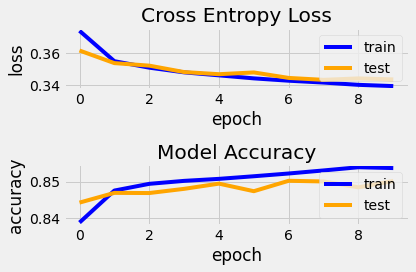

Epoch 1/10
483/483 [==============================] - 16s 34ms/step - loss: 0.3383 - accuracy: 0.8536 - val_loss: 0.3433 - val_accuracy: 0.8483
Epoch 2/10
483/483 [==============================] - 16s 34ms/step - loss: 0.3369 - accuracy: 0.8550 - val_loss: 0.3433 - val_accuracy: 0.8519
Epoch 3/10
483/483 [==============================] - 16s 34ms/step - loss: 0.3360 - accuracy: 0.8548 - val_loss: 0.3419 - val_accuracy: 0.8507
Epoch 4/10
483/483 [==============================] - 17s 35ms/step - loss: 0.3351 - accuracy: 0.8562 - val_loss: 0.3413 - val_accuracy: 0.8509
Epoch 5/10
483/483 [==============================] - 17s 35ms/step - loss: 0.3343 - accuracy: 0.8561 - val_loss: 0.3416 - val_accuracy: 0.8505
Epoch 6/10
483/483 [==============================] - 16s 34ms/step - loss: 0.3327 - accuracy: 0.8564 - val_loss: 0.3401 - val_accuracy: 0.8516
Epoch 7/10
483/483 [==============================] - 17s 34ms/step - loss: 0.3323 - accuracy: 0.8575 - val_loss: 0.3395 - val_accuracy:

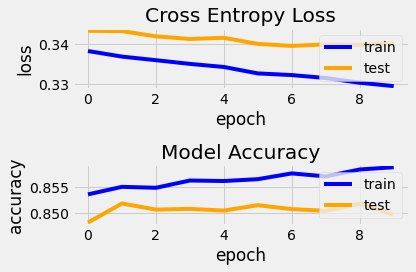

Epoch 1/10
483/483 [==============================] - 16s 33ms/step - loss: 0.3283 - accuracy: 0.8587 - val_loss: 0.3382 - val_accuracy: 0.8518
Epoch 2/10
483/483 [==============================] - 16s 34ms/step - loss: 0.3276 - accuracy: 0.8585 - val_loss: 0.3407 - val_accuracy: 0.8500
Epoch 3/10
483/483 [==============================] - 17s 35ms/step - loss: 0.3265 - accuracy: 0.8597 - val_loss: 0.3380 - val_accuracy: 0.8526
Epoch 4/10
483/483 [==============================] - 17s 36ms/step - loss: 0.3255 - accuracy: 0.8598 - val_loss: 0.3393 - val_accuracy: 0.8505
Epoch 5/10
483/483 [==============================] - 18s 37ms/step - loss: 0.3244 - accuracy: 0.8604 - val_loss: 0.3410 - val_accuracy: 0.8500
Epoch 6/10
483/483 [==============================] - 16s 33ms/step - loss: 0.3230 - accuracy: 0.8612 - val_loss: 0.3384 - val_accuracy: 0.8509
Epoch 7/10
483/483 [==============================] - 14s 30ms/step - loss: 0.3227 - accuracy: 0.8612 - val_loss: 0.3386 - val_accuracy:

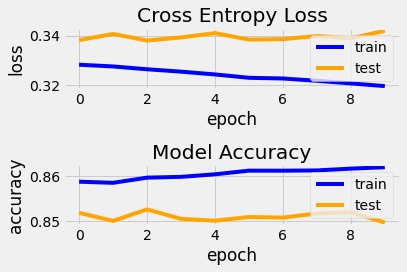

Epoch 1/10
483/483 [==============================] - 14s 28ms/step - loss: 0.3187 - accuracy: 0.8628 - val_loss: 0.3379 - val_accuracy: 0.8521
Epoch 2/10
483/483 [==============================] - 14s 29ms/step - loss: 0.3181 - accuracy: 0.8626 - val_loss: 0.3374 - val_accuracy: 0.8501
Epoch 3/10
483/483 [==============================] - 14s 29ms/step - loss: 0.3168 - accuracy: 0.8631 - val_loss: 0.3389 - val_accuracy: 0.8517
Epoch 4/10
483/483 [==============================] - 14s 29ms/step - loss: 0.3161 - accuracy: 0.8638 - val_loss: 0.3395 - val_accuracy: 0.8511
Epoch 5/10
483/483 [==============================] - 13s 28ms/step - loss: 0.3149 - accuracy: 0.8648 - val_loss: 0.3392 - val_accuracy: 0.8505
Epoch 6/10
483/483 [==============================] - 14s 28ms/step - loss: 0.3141 - accuracy: 0.8645 - val_loss: 0.3392 - val_accuracy: 0.8510
Epoch 7/10
483/483 [==============================] - 15s 31ms/step - loss: 0.3135 - accuracy: 0.8651 - val_loss: 0.3400 - val_accuracy:

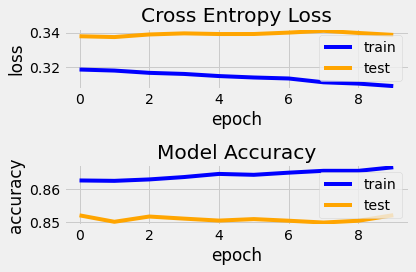

Epoch 1/10
483/483 [==============================] - 15s 31ms/step - loss: 0.3079 - accuracy: 0.8677 - val_loss: 0.3452 - val_accuracy: 0.8500
Epoch 2/10
483/483 [==============================] - 14s 28ms/step - loss: 0.3071 - accuracy: 0.8673 - val_loss: 0.3430 - val_accuracy: 0.8500
Epoch 3/10
483/483 [==============================] - 13s 28ms/step - loss: 0.3052 - accuracy: 0.8683 - val_loss: 0.3424 - val_accuracy: 0.8500
Epoch 4/10
483/483 [==============================] - 13s 28ms/step - loss: 0.3051 - accuracy: 0.8700 - val_loss: 0.3432 - val_accuracy: 0.8496
Epoch 5/10
483/483 [==============================] - 14s 28ms/step - loss: 0.3035 - accuracy: 0.8686 - val_loss: 0.3420 - val_accuracy: 0.8505
Epoch 6/10
483/483 [==============================] - 14s 29ms/step - loss: 0.3018 - accuracy: 0.8708 - val_loss: 0.3435 - val_accuracy: 0.8486
Epoch 7/10
483/483 [==============================] - 14s 29ms/step - loss: 0.3016 - accuracy: 0.8702 - val_loss: 0.3446 - val_accuracy:

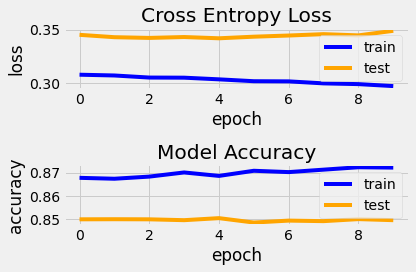

Epoch 1/10
483/483 [==============================] - 13s 27ms/step - loss: 0.2959 - accuracy: 0.8731 - val_loss: 0.3510 - val_accuracy: 0.8509
Epoch 2/10
483/483 [==============================] - 13s 27ms/step - loss: 0.2949 - accuracy: 0.8730 - val_loss: 0.3481 - val_accuracy: 0.8484
Epoch 3/10
483/483 [==============================] - 13s 27ms/step - loss: 0.2934 - accuracy: 0.8740 - val_loss: 0.3538 - val_accuracy: 0.8488
Epoch 4/10
483/483 [==============================] - 13s 27ms/step - loss: 0.2914 - accuracy: 0.8752 - val_loss: 0.3538 - val_accuracy: 0.8480
Epoch 5/10
483/483 [==============================] - 13s 27ms/step - loss: 0.2916 - accuracy: 0.8745 - val_loss: 0.3512 - val_accuracy: 0.8496
Epoch 6/10
483/483 [==============================] - 13s 26ms/step - loss: 0.2898 - accuracy: 0.8760 - val_loss: 0.3532 - val_accuracy: 0.8487
Epoch 7/10
483/483 [==============================] - 13s 27ms/step - loss: 0.2878 - accuracy: 0.8772 - val_loss: 0.3535 - val_accuracy:

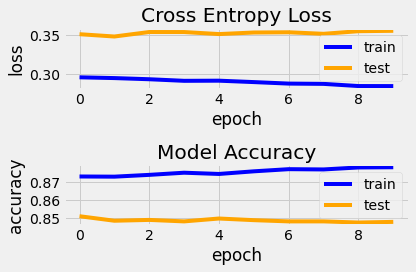

Epoch 1/10
483/483 [==============================] - 13s 27ms/step - loss: 0.2818 - accuracy: 0.8791 - val_loss: 0.3565 - val_accuracy: 0.8465
Epoch 2/10
483/483 [==============================] - 13s 27ms/step - loss: 0.2814 - accuracy: 0.8794 - val_loss: 0.3628 - val_accuracy: 0.8458
Epoch 3/10
483/483 [==============================] - 13s 26ms/step - loss: 0.2802 - accuracy: 0.8795 - val_loss: 0.3600 - val_accuracy: 0.8460
Epoch 4/10
483/483 [==============================] - 13s 27ms/step - loss: 0.2793 - accuracy: 0.8804 - val_loss: 0.3582 - val_accuracy: 0.8451
Epoch 5/10
483/483 [==============================] - 14s 28ms/step - loss: 0.2765 - accuracy: 0.8818 - val_loss: 0.3613 - val_accuracy: 0.8445
Epoch 6/10
483/483 [==============================] - 14s 29ms/step - loss: 0.2763 - accuracy: 0.8814 - val_loss: 0.3622 - val_accuracy: 0.8452
Epoch 7/10
483/483 [==============================] - 14s 29ms/step - loss: 0.2749 - accuracy: 0.8827 - val_loss: 0.3607 - val_accuracy:

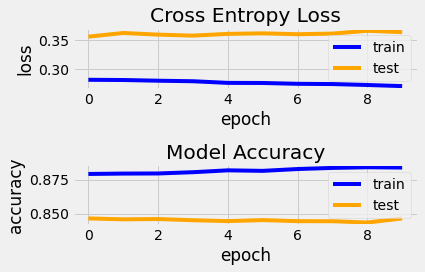

Epoch 1/10
483/483 [==============================] - 39s 80ms/step - loss: 0.2703 - accuracy: 0.8846 - val_loss: 0.3678 - val_accuracy: 0.8446
Epoch 2/10
483/483 [==============================] - 44s 92ms/step - loss: 0.2697 - accuracy: 0.8848 - val_loss: 0.3681 - val_accuracy: 0.8451
Epoch 3/10
483/483 [==============================] - 35s 73ms/step - loss: 0.2687 - accuracy: 0.8859 - val_loss: 0.3669 - val_accuracy: 0.8428
Epoch 4/10
483/483 [==============================] - 34s 71ms/step - loss: 0.2660 - accuracy: 0.8860 - val_loss: 0.3704 - val_accuracy: 0.8412
Epoch 5/10
483/483 [==============================] - 39s 81ms/step - loss: 0.2640 - accuracy: 0.8871 - val_loss: 0.3712 - val_accuracy: 0.8432
Epoch 6/10
483/483 [==============================] - 39s 81ms/step - loss: 0.2639 - accuracy: 0.8874 - val_loss: 0.3747 - val_accuracy: 0.8435
Epoch 7/10
483/483 [==============================] - 35s 72ms/step - loss: 0.2642 - accuracy: 0.8878 - val_loss: 0.3751 - val_accuracy:

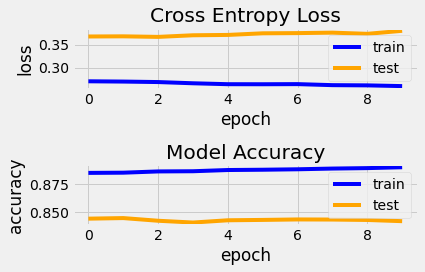

Epoch 1/10
483/483 [==============================] - 39s 81ms/step - loss: 0.2596 - accuracy: 0.8894 - val_loss: 0.3776 - val_accuracy: 0.8446
Epoch 2/10
483/483 [==============================] - 38s 78ms/step - loss: 0.2586 - accuracy: 0.8902 - val_loss: 0.3794 - val_accuracy: 0.8427
Epoch 3/10
483/483 [==============================] - 40s 83ms/step - loss: 0.2560 - accuracy: 0.8906 - val_loss: 0.3826 - val_accuracy: 0.8445
Epoch 4/10
483/483 [==============================] - 42s 86ms/step - loss: 0.2556 - accuracy: 0.8918 - val_loss: 0.3815 - val_accuracy: 0.8414
Epoch 5/10
483/483 [==============================] - 37s 78ms/step - loss: 0.2557 - accuracy: 0.8907 - val_loss: 0.3770 - val_accuracy: 0.8419
Epoch 6/10
483/483 [==============================] - 36s 75ms/step - loss: 0.2531 - accuracy: 0.8925 - val_loss: 0.3808 - val_accuracy: 0.8438
Epoch 7/10
483/483 [==============================] - 39s 81ms/step - loss: 0.2525 - accuracy: 0.8929 - val_loss: 0.3858 - val_accuracy:

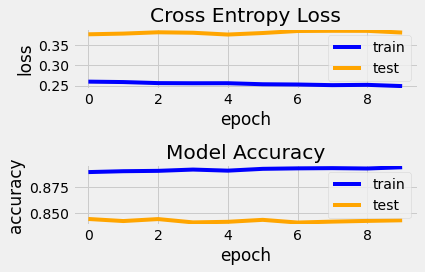

Epoch 1/10
483/483 [==============================] - 48s 99ms/step - loss: 0.2483 - accuracy: 0.8947 - val_loss: 0.3877 - val_accuracy: 0.8421
Epoch 2/10
483/483 [==============================] - 38s 78ms/step - loss: 0.2479 - accuracy: 0.8953 - val_loss: 0.3861 - val_accuracy: 0.8396
Epoch 3/10
483/483 [==============================] - 37s 76ms/step - loss: 0.2457 - accuracy: 0.8964 - val_loss: 0.3902 - val_accuracy: 0.8429
Epoch 4/10
483/483 [==============================] - 2218s 5s/step - loss: 0.2454 - accuracy: 0.8968 - val_loss: 0.3914 - val_accuracy: 0.8379
Epoch 5/10
483/483 [==============================] - 13s 26ms/step - loss: 0.2441 - accuracy: 0.8961 - val_loss: 0.3883 - val_accuracy: 0.8406
Epoch 6/10
483/483 [==============================] - 12s 25ms/step - loss: 0.2437 - accuracy: 0.8971 - val_loss: 0.3933 - val_accuracy: 0.8405
Epoch 7/10
483/483 [==============================] - 12s 25ms/step - loss: 0.2451 - accuracy: 0.8951 - val_loss: 0.3910 - val_accuracy:

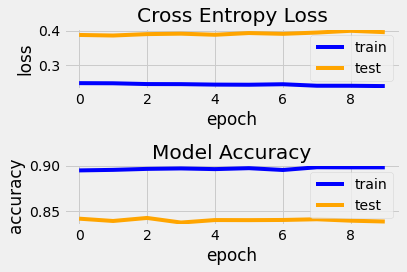

[[0.343443363904953, 0.8502222895622253], [0.34022802114486694, 0.8497639894485474], [0.3419661223888397, 0.8496264815330505], [0.33866098523139954, 0.8521472215652466], [0.34901919960975647, 0.8496264815330505], [0.35537803173065186, 0.8477473855018616], [0.3642626106739044, 0.8464640974998474], [0.3801507353782654, 0.8423850536346436], [0.3819594979286194, 0.8433933854103088], [0.39580249786376953, 0.8389935493469238]]
Mean Accuracy: 0.85% 


In [44]:
repeats =10
for model in models:
    model_index =1;
    print("Model #", model_index)
    model_index+=1
    scores = list()
    for r in range(repeats):
        history, score= fit_and_evalute(model)
        scores.append(score)
        plt.subplot(2, 1, 1)
        plt.title('Cross Entropy Loss')
        plt.plot(history.history['loss'], color='blue', label='train')
        plt.plot(history.history['val_loss'], color='orange', label='test')
        plt.title('Cross Entropy Loss')
        plt.ylabel('loss')
        plt.xlabel('epoch')
        plt.legend(['train', 'test'], loc='upper right')
        # plot accuracy
        plt.subplot(2, 1, 2)
        plt.title('Classification Accuracy')
        plt.plot(history.history['accuracy'], color='blue', label='train')
        plt.plot(history.history['val_accuracy'], color='orange', label='test')
        plt.title('Model Accuracy')
        plt.ylabel('accuracy')
        plt.xlabel('epoch')
        plt.legend(['train', 'test'], loc='lower right')
        plt.tight_layout()
        plt.show()
    summarize_results(scores)